In [1]:
import numpy as np
from matplotlib import pyplot as plt
import copy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
dict_of_ws_for_viz = {}
dict_of_errs_for_viz = {}
learning_rate = 0.0001
adaptive_learning_rate = 5.

In [3]:
# #STOCHASTIC GRADIENT DESCENT - y = w1*x1 + w2*x2
# lst_of_ys = np.array([2, 2.5, 4, 5])
# lst_of_xs = np.array([[1, 1],[0.5,2], [3,1], [2,3]])
# #USED WEIGHTS - W1 = 1; W2 = 1
# lst_of_ws = np.random.random(2)
# orig_lst_of_ws = copy.deepcopy(lst_of_ws)
# counter = 0
# viz_ws = []
# orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
# print lst_of_ws
# lst_of_errs = []
# while orig_err > 0.0001:
#     err = [lst_of_ys[i] - (lst_of_ws[0] * m[0] + lst_of_ws[1] * m[1]) for i, m in enumerate(lst_of_xs)]
#     delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
#     lst_of_ws -= 0.0001 * delta
#     viz_ws.append(copy.deepcopy(lst_of_ws))
#     orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
#     lst_of_errs.append(orig_err)
#     counter += 1
# print counter

In [4]:
# #STOCHASTIC GRADIENT DESCENT - y = w1*x1 + w2*x2
# lst_of_ys = np.array([2, 2.5, 4, 5])
# lst_of_xs = np.array([[1, 1],[0.5,2], [3,1], [2,3]])
# #USED WEIGHTS - W1 = 1; W2 = 1
# lst_of_ws = np.random.random(2)
# orig_lst_of_ws = copy.deepcopy(lst_of_ws)
# counter = 0
# orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
# print "STARTING WEIGHTS: ", lst_of_ws
# print "STARTING ERROR: ", orig_err
# lst_of_errs = []
# viz_ws = []
# delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
# #print np.abs(delta)
# while np.any(np.abs(delta) > 0.005):
#     delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
# #     print np.any(np.abs(delta) > 0.005)
#     lst_of_ws -= 0.0001 * delta
#     viz_ws.append(copy.deepcopy(lst_of_ws))
#     orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
#     lst_of_errs.append(orig_err)
#     counter += 1
# print "FINAL ERROR: ", orig_err
# print "FINAL WEIGHTS: ", lst_of_ws
# print "NUMBER OF STEPS: ", counter

In [5]:
# plt.ylim([0, 0.5])
# plt.plot([x for x in range(len(lst_of_errs))], lst_of_errs)

In [6]:
#PREPARING SOME RANDOM DATA IN 3 DIMENSION WITH EQUATION Y = AX1 + BX2
#y = 10x1 + 15x2
x1 = [x * 1./1000 for x in range(1000)]
x2 = [x * 1./1000 for x in range(1000)]
np.random.shuffle(x1)
# np.random.shuffle(x2)
x1 = np.array(x1); x2 = np.array(x2)
randomiser = np.random.random(len(x1))*1.
y = 1.5 * x1 + 3.7 * x2 + randomiser*1./10

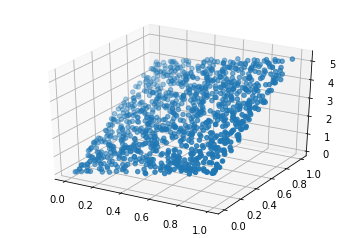

In [7]:
#DATA VIS IN 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax = plt.axes(projection='3d')
ax.scatter(x1, x2, y, zdir='z', s=20, c=None, depthshade=True)

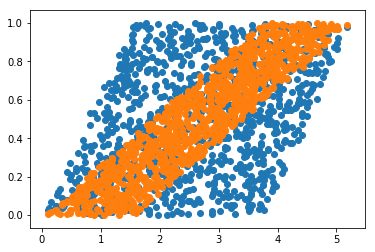

In [8]:
#DATA VIS IN 2D
plt.scatter(y, x1)
plt.scatter(y, x2)

In [9]:
# #SGD
# lst_of_ys = y
# lst_of_xs = np.array([x1, x2]).T
# lst_of_ws = np.random.random(2)
# orig_lst_of_ws = copy.deepcopy(lst_of_ws)
# counter = 0
# orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
# print "STARTING WEIGHTS: ", lst_of_ws
# print "STARTING ERROR: ", orig_err
# lst_of_errs = []
# viz_ws = [copy.deepcopy(lst_of_ws)]
# delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
# #print np.abs(delta)
# while np.any(np.abs(delta) > 0.005):
#     delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
# #     print np.any(np.abs(delta) > 0.005)
#     lst_of_ws -= learning_rate * delta
#     viz_ws.append(copy.deepcopy(lst_of_ws))
#     orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
#     lst_of_errs.append(orig_err)
#     counter += 1
# dict_of_ws_for_viz['SGD'] = viz_ws
# dict_of_errs_for_viz['SGD'] = lst_of_errs
# print "FINAL ERROR: ", orig_err
# print "FINAL WEIGHTS: ", lst_of_ws
# print "NUMBER OF STEPS: ", counter

In [10]:
def SGD(lst_of_xs, lst_of_ys, lst_of_ws, learning_rate):
    dict_of_ws_for_viz = {}
    dict_of_errs_for_viz = {}
    orig_lst_of_ws = copy.deepcopy(lst_of_ws)
    counter = 0
    orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
    print "STARTING WEIGHTS: ", lst_of_ws
    print "STARTING ERROR: ", orig_err
    lst_of_errs = []
    viz_ws = [copy.deepcopy(lst_of_ws)]
    delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
    #print np.abs(delta)
    while np.any(np.abs(delta) > 0.005) and counter < 10000:
        delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs) * 1./ len(lst_of_ys)
    #     print np.any(np.abs(delta) > 0.005)
        lst_of_ws -= learning_rate * delta
        viz_ws.append(copy.deepcopy(lst_of_ws))
        orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2) * 1. / len(lst_of_ys)
        lst_of_errs.append(orig_err)
        counter += 1
    dict_of_ws_for_viz['SGD'] = viz_ws
    dict_of_errs_for_viz['SGD'] = lst_of_errs
    print "FINAL ERROR: ", orig_err
    print "FINAL WEIGHTS: ", lst_of_ws
    print "NUMBER OF STEPS: ", counter
    return dict_of_ws_for_viz, dict_of_errs_for_viz, lst_of_ws

def Momentum_SGD(lst_of_xs, lst_of_ys, lst_of_ws, learning_rate):
    dict_of_ws_for_viz = {}
    dict_of_errs_for_viz = {}
    orig_lst_of_ws = copy.deepcopy(lst_of_ws)
    #orig_lst_of_ws = copy.deepcopy(lst_of_ws)
    counter = 0
    orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
    print "STARTING WEIGHTS: ", lst_of_ws
    print "STARTING ERROR: ", orig_err
    lst_of_errs = []
    viz_ws = [copy.deepcopy(lst_of_ws)]
    delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
    prev_delta = np.zeros(delta.shape)
    #print np.abs(delta)
    #prev_delta = copy.deepcopy(delta)
    while np.any(np.abs(delta) > 0.005) and counter < 10000:
        delta = 0.9*prev_delta + -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs) * 1./ len(lst_of_ys)
        prev_delta = copy.deepcopy(delta)
    #     print np.any(np.abs(delta) > 0.005)
        lst_of_ws -= learning_rate * delta
        viz_ws.append(copy.deepcopy(lst_of_ws))
        orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2) * 1./ len(lst_of_ys)
        lst_of_errs.append(orig_err)
        counter += 1
    dict_of_ws_for_viz['Momentum_SGD'] = viz_ws
    dict_of_errs_for_viz['Momentum_SGD'] = lst_of_errs
    print "FINAL ERROR: ", orig_err
    print "FINAL WEIGHTS: ", lst_of_ws
    print "NUMBER OF STEPS: ", counter
    return dict_of_ws_for_viz, dict_of_errs_for_viz, lst_of_ws

def Nesterov_Momentum_SGD(lst_of_xs, lst_of_ys, lst_of_ws, learning_rate):
    dict_of_ws_for_viz = {}
    dict_of_errs_for_viz = {}
    orig_lst_of_ws = copy.deepcopy(lst_of_ws)
    counter = 0
    orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
    print "STARTING WEIGHTS: ", lst_of_ws
    print "STARTING ERROR: ", orig_err
    lst_of_errs = []
    viz_ws = [copy.deepcopy(lst_of_ws)]
    delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
    prev_delta = np.zeros(delta.shape)
    #print np.abs(delta)
    #prev_delta = copy.deepcopy(delta)
    while np.any(np.abs(delta) > 0.005) and counter < 10000:
        delta = 0.9*prev_delta + -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs) * 1./ len(lst_of_ys)
        prev_delta = copy.deepcopy(delta)
    #     print np.any(np.abs(delta) > 0.005)
        lst_of_ws -= learning_rate * (delta + 0.9 * prev_delta)
        orig_err = np.sum((lst_of_ys - (lst_of_ws).dot(lst_of_xs.T))**2) * 1./ len(lst_of_ys)
        lst_of_errs.append(orig_err)
        viz_ws.append(copy.deepcopy(lst_of_ws))
        counter += 1
    dict_of_ws_for_viz['Nesterov_Momentum_SGD'] = viz_ws
    dict_of_errs_for_viz['Nesterov_Momentum_SGD'] = lst_of_errs
    print "FINAL ERROR: ", orig_err
    print "FINAL WEIGHTS: ", lst_of_ws
    print "NUMBER OF STEPS: ", counter
    return dict_of_ws_for_viz, dict_of_errs_for_viz, lst_of_ws

def ADAGRAD(lst_of_xs, lst_of_ys, lst_of_ws, learning_rate):
    dict_of_ws_for_viz = {}
    dict_of_errs_for_viz = {}
    orig_lst_of_ws = copy.deepcopy(lst_of_ws)
    counter = 0
    orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
    print "STARTING WEIGHTS: ", lst_of_ws
    print "STARTING ERROR: ", orig_err
    lst_of_errs = []
    viz_ws = [copy.deepcopy(lst_of_ws)]
    delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
    prev_delta = np.zeros(delta.shape)
    cache = np.zeros(delta.shape)
    #print np.abs(delta)
    #prev_delta = copy.deepcopy(delta)
    while np.any(np.abs(delta) > 0.005) and counter < 10000:
        delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs) * 1./ len(lst_of_ys)
        cache += delta ** 2 * 1. / len(lst_of_ys ** 2)
        prev_delta = copy.deepcopy(delta)
    #     print np.any(np.abs(delta) > 0.005)
        lst_of_ws -= learning_rate * (delta) / (np.sqrt(cache) + 0.000001)
        viz_ws.append(copy.deepcopy(lst_of_ws))
        orig_err = np.sum((lst_of_ys - (lst_of_ws).dot(lst_of_xs.T))**2) * 1./ len(lst_of_ys)
        lst_of_errs.append(orig_err)
        counter += 1
    dict_of_ws_for_viz['ADAGRAD'] = viz_ws
    dict_of_errs_for_viz['ADAGRAD'] = lst_of_errs
    print "FINAL ERROR: ", orig_err
    print "FINAL WEIGHTS: ", lst_of_ws
    print "NUMBER OF STEPS: ", counter
    return dict_of_ws_for_viz, dict_of_errs_for_viz, lst_of_ws
    
def RMSPROP(lst_of_xs, lst_of_ys, lst_of_ws, learning_rate):
    dict_of_ws_for_viz = {}
    dict_of_errs_for_viz = {}
    orig_lst_of_ws = copy.deepcopy(lst_of_ws)
    counter = 0
    orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
    print "STARTING WEIGHTS: ", lst_of_ws
    print "STARTING ERROR: ", orig_err
    lst_of_errs = []
    viz_ws = [copy.deepcopy(lst_of_ws)]
    delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
    prev_delta = np.zeros(delta.shape)
    cache = np.zeros(delta.shape)
    #print np.abs(delta)
    #prev_delta = copy.deepcopy(delta)
    while np.any(np.abs(delta) > 0.005) and counter < 10000:
        delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs) * 1./ len(lst_of_ys)
        cache = (0.01 * delta ** 2 * 1. / (len(lst_of_ys ** 2))) + 0.99 * cache
        prev_delta = copy.deepcopy(delta)
    #     print np.any(np.abs(delta) > 0.005)
        lst_of_ws -= learning_rate * (delta) / (np.sqrt(cache) + 0.000001)
        viz_ws.append(copy.deepcopy(lst_of_ws))
        orig_err = np.sum((lst_of_ys - (lst_of_ws).dot(lst_of_xs.T))**2) * 1./ len(lst_of_ys)
        lst_of_errs.append(orig_err)
        counter += 1
    dict_of_ws_for_viz['RMSPROP'] = viz_ws
    dict_of_errs_for_viz['RMSPROP'] = lst_of_errs
    print "FINAL ERROR: ", orig_err
    print "FINAL WEIGHTS: ", lst_of_ws
    print "NUMBER OF STEPS: ", counter
    return dict_of_ws_for_viz, dict_of_errs_for_viz, lst_of_ws

def ADAM(lst_of_xs, lst_of_ys, lst_of_ws, learning_rate):
    dict_of_ws_for_viz = {}
    dict_of_errs_for_viz = {}
    orig_lst_of_ws = copy.deepcopy(lst_of_ws)
    counter = 0
    orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
    print "STARTING WEIGHTS: ", lst_of_ws
    print "STARTING ERROR: ", orig_err
    lst_of_errs = []
    viz_ws = [copy.deepcopy(lst_of_ws)]
    delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs) * 1./ len(lst_of_ys)
    cache = np.zeros(delta.shape)
    #print np.abs(delta)
    while np.any(np.abs(delta) > 0.005) and counter < 10000:
        dx = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs) * 1./ len(lst_of_ys)
        delta = 0.9*delta + 0.1 * dx
        cache = (0.01 * dx ** 2) + 0.99 * cache
    #     print np.any(np.abs(delta) > 0.005)
    #     delta /= 1 - 0.9 ** (counter + 1)
    #     cache /= 1 - 0.99 ** (counter + 1)
        lst_of_ws -= learning_rate * (delta) / (np.sqrt(cache) + 0.000001)
        viz_ws.append(copy.deepcopy(lst_of_ws))
        orig_err = np.sum((lst_of_ys - (lst_of_ws).dot(lst_of_xs.T))**2) * 1./ len(lst_of_ys)
        lst_of_errs.append(orig_err)
        counter += 1
    dict_of_ws_for_viz['ADAM'] = viz_ws
    dict_of_errs_for_viz['ADAM'] = lst_of_errs
    print "FINAL ERROR: ", orig_err
    print "FINAL WEIGHTS: ", lst_of_ws
    print "NUMBER OF STEPS: ", counter
    return dict_of_ws_for_viz, dict_of_errs_for_viz, lst_of_ws

In [11]:
# #MOMENTUM GRADIENT DESCENT
# lst_of_ys = y
# lst_of_xs = np.array([x1, x2]).T
# lst_of_ws = np.random.random(2)
# orig_lst_of_ws = copy.deepcopy(lst_of_ws)
# #orig_lst_of_ws = copy.deepcopy(lst_of_ws)
# counter = 0
# orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
# print "STARTING WEIGHTS: ", lst_of_ws
# print "STARTING ERROR: ", orig_err
# lst_of_errs = []
# viz_ws = [copy.deepcopy(lst_of_ws)]
# delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
# prev_delta = np.zeros(delta.shape)
# #print np.abs(delta)
# #prev_delta = copy.deepcopy(delta)
# while np.any(np.abs(delta) > 0.005):
#     delta = 0.9*prev_delta + -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
#     prev_delta = copy.deepcopy(delta)
# #     print np.any(np.abs(delta) > 0.005)
#     lst_of_ws -= learning_rate * delta
#     viz_ws.append(copy.deepcopy(lst_of_ws))
#     orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
#     lst_of_errs.append(orig_err)
#     counter += 1
# dict_of_ws_for_viz['Momentum SGD'] = viz_ws
# dict_of_errs_for_viz['Momentum SGD'] = lst_of_errs
# print "FINAL ERROR: ", orig_err
# print "FINAL WEIGHTS: ", lst_of_ws
# print "NUMBER OF STEPS: ", counter

In [12]:
# #NESTEROV MOMENTUM GRADIENT DESCENT
# lst_of_ys = y
# lst_of_xs = np.array([x1, x2]).T
# lst_of_ws = np.random.random(2)
# orig_lst_of_ws = copy.deepcopy(lst_of_ws)
# counter = 0
# orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
# print "STARTING WEIGHTS: ", lst_of_ws
# print "STARTING ERROR: ", orig_err
# lst_of_errs = []
# viz_ws = [copy.deepcopy(lst_of_ws)]
# delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
# prev_delta = np.zeros(delta.shape)
# #print np.abs(delta)
# #prev_delta = copy.deepcopy(delta)
# while np.any(np.abs(delta) > 0.005):
#     delta = 0.9*prev_delta + -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
#     prev_delta = copy.deepcopy(delta)
# #     print np.any(np.abs(delta) > 0.005)
#     lst_of_ws -= learning_rate * (delta + 0.9 * prev_delta)
#     orig_err = np.sum((lst_of_ys - (lst_of_ws).dot(lst_of_xs.T))**2)
#     lst_of_errs.append(orig_err)
#     viz_ws.append(copy.deepcopy(lst_of_ws))
#     counter += 1
# dict_of_ws_for_viz['Nesterov Momentum SGD'] = viz_ws
# dict_of_errs_for_viz['Nesterov Momentum SGD'] = lst_of_errs
# print "FINAL ERROR: ", orig_err
# print "FINAL WEIGHTS: ", lst_of_ws
# print "NUMBER OF STEPS: ", counter

In [13]:
# #ADAGRAD
# lst_of_ys = y
# lst_of_xs = np.array([x1, x2]).T
# lst_of_ws = np.random.random(2)
# orig_lst_of_ws = copy.deepcopy(lst_of_ws)
# counter = 0
# orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
# print "STARTING WEIGHTS: ", lst_of_ws
# print "STARTING ERROR: ", orig_err
# lst_of_errs = []
# viz_ws = [copy.deepcopy(lst_of_ws)]
# delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
# prev_delta = np.zeros(delta.shape)
# cache = np.zeros(delta.shape)
# #print np.abs(delta)
# #prev_delta = copy.deepcopy(delta)
# while np.any(np.abs(delta) > 0.005):
#     delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
#     cache += delta ** 2
#     prev_delta = copy.deepcopy(delta)
# #     print np.any(np.abs(delta) > 0.005)
#     lst_of_ws -= adaptive_learning_rate * (delta) / (np.sqrt(cache) + 0.000001)
#     viz_ws.append(copy.deepcopy(lst_of_ws))
#     orig_err = np.sum((lst_of_ys - (lst_of_ws).dot(lst_of_xs.T))**2)
#     lst_of_errs.append(orig_err)
#     counter += 1
# dict_of_ws_for_viz['ADAGRAD'] = viz_ws
# dict_of_errs_for_viz['ADAGRAD'] = lst_of_errs
# print "FINAL ERROR: ", orig_err
# print "FINAL WEIGHTS: ", lst_of_ws
# print "NUMBER OF STEPS: ", counter

In [14]:
# #RMS PROP
# lst_of_ys = y
# lst_of_xs = np.array([x1, x2]).T
# lst_of_ws = np.random.random(2)
# orig_lst_of_ws = copy.deepcopy(lst_of_ws)
# counter = 0
# orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
# print "STARTING WEIGHTS: ", lst_of_ws
# print "STARTING ERROR: ", orig_err
# lst_of_errs = []
# viz_ws = [copy.deepcopy(lst_of_ws)]
# delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
# prev_delta = np.zeros(delta.shape)
# cache = np.zeros(delta.shape)
# #print np.abs(delta)
# #prev_delta = copy.deepcopy(delta)
# while np.any(np.abs(delta) > 0.005):
#     delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
#     cache = (0.01 * delta ** 2) + 0.99 * cache
#     prev_delta = copy.deepcopy(delta)
# #     print np.any(np.abs(delta) > 0.005)
#     lst_of_ws -= adaptive_learning_rate * (delta) / (np.sqrt(cache) + 0.000001)
#     viz_ws.append(copy.deepcopy(lst_of_ws))
#     orig_err = np.sum((lst_of_ys - (lst_of_ws).dot(lst_of_xs.T))**2)
#     lst_of_errs.append(orig_err)
#     counter += 1
# dict_of_ws_for_viz['RMSPROP'] = viz_ws
# dict_of_errs_for_viz['RMSPROP'] = lst_of_errs
# print "FINAL ERROR: ", orig_err
# print "FINAL WEIGHTS: ", lst_of_ws
# print "NUMBER OF STEPS: ", counter

In [15]:
# #ADAM
# lst_of_ys = y
# lst_of_xs = np.array([x1, x2]).T
# lst_of_ws = np.random.random(2)
# orig_lst_of_ws = copy.deepcopy(lst_of_ws)
# counter = 0
# orig_err = np.sum((lst_of_ys - lst_of_ws.dot(lst_of_xs.T))**2)
# print "STARTING WEIGHTS: ", lst_of_ws
# print "STARTING ERROR: ", orig_err
# lst_of_errs = []
# viz_ws = [copy.deepcopy(lst_of_ws)]
# delta = -2 * (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
# cache = np.zeros(delta.shape)
# #print np.abs(delta)
# while np.any(np.abs(delta) > 0.005):
#     dx = (lst_of_ys - lst_of_ws.dot(lst_of_xs.T)).dot(lst_of_xs)
#     delta = 0.9*delta + -2 * 0.1 * dx
#     cache = (0.01 * dx ** 2) + 0.99 * cache
# #     print np.any(np.abs(delta) > 0.005)
# #     delta /= 1 - 0.9 ** (counter + 1)
# #     cache /= 1 - 0.99 ** (counter + 1)
#     lst_of_ws -= adaptive_learning_rate * (delta) / (np.sqrt(cache) + 0.000001)
#     viz_ws.append(copy.deepcopy(lst_of_ws))
#     orig_err = np.sum((lst_of_ys - (lst_of_ws).dot(lst_of_xs.T))**2)
#     lst_of_errs.append(orig_err)
#     counter += 1
# dict_of_ws_for_viz['ADAM'] = viz_ws
# dict_of_errs_for_viz['ADAM'] = lst_of_errs
# print "FINAL ERROR: ", orig_err
# print "FINAL WEIGHTS: ", lst_of_ws
# print "NUMBER OF STEPS: ", counter

In [16]:
lst_of_ys = y
lst_of_xs = np.array([x1, x2]).T
lst_of_ws = np.random.random(2)
#aa = sgd(lst_of_xs, lst_of_ys, lst_of_ws, 0.0001)
lst_of_learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
order = ['SGD', 'Momentum_SGD', 'Nesterov_Momentum_SGD', 'ADAGRAD', 'RMSPROP', 'ADAM']
dict_w_learning_rates = {}
for each_rate in lst_of_learning_rates:
    dict_w_learning_rates[each_rate] = {}
    for each_algo in order:
        print each_algo, each_rate
        aa = locals()[each_algo](lst_of_xs, lst_of_ys, copy.deepcopy(lst_of_ws), each_rate)
        dict_w_learning_rates[each_rate].update(aa[0])

SGD 0.0001
STARTING WEIGHTS:  [0.33434648 0.51882743]
STARTING ERROR:  5878.403490012388
FINAL ERROR:  0.6835913174459122
FINAL WEIGHTS:  [1.69906803 2.19908356]
NUMBER OF STEPS:  10000
Momentum_SGD 0.0001
STARTING WEIGHTS:  [0.33434648 0.51882743]
STARTING ERROR:  5878.403490012388
FINAL ERROR:  0.006855490478025327
FINAL WEIGHTS:  [1.72764028 3.55922526]
NUMBER OF STEPS:  10000
Nesterov_Momentum_SGD 0.0001
STARTING WEIGHTS:  [0.33434648 0.51882743]
STARTING ERROR:  5878.403490012388
FINAL ERROR:  0.0014330752329393475
FINAL WEIGHTS:  [1.58421727 3.70268403]
NUMBER OF STEPS:  10000
ADAGRAD 0.0001
STARTING WEIGHTS:  [0.33434648 0.51882743]
STARTING ERROR:  5878.403490012388
FINAL ERROR:  3.2275486769501853
FINAL WEIGHTS:  [0.92646696 1.11603555]
NUMBER OF STEPS:  10000
RMSPROP 0.0001
STARTING WEIGHTS:  [0.33434648 0.51882743]
STARTING ERROR:  5878.403490012388
FINAL ERROR:  0.0012354278196204064
FINAL WEIGHTS:  [1.56252298 3.72147887]
NUMBER OF STEPS:  1410
ADAM 0.0001
STARTING WEIGHTS

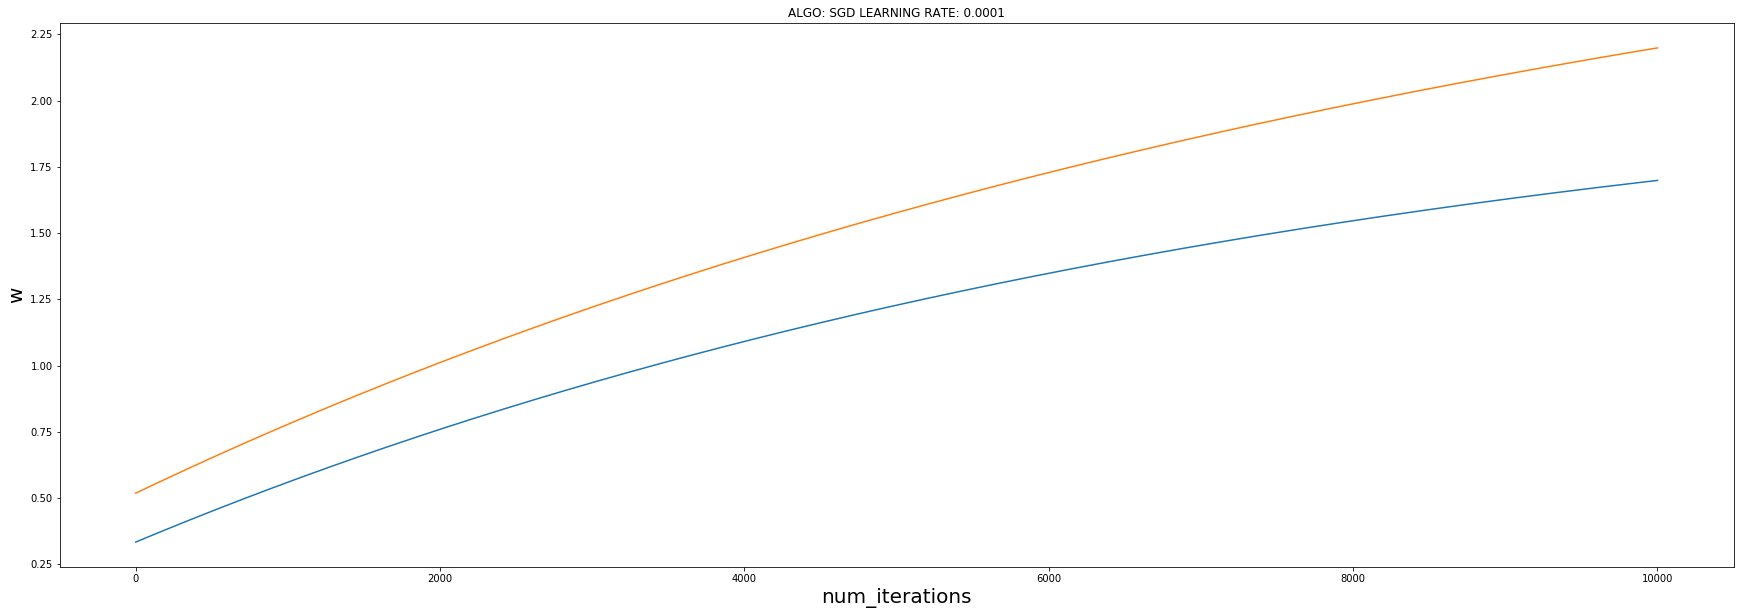

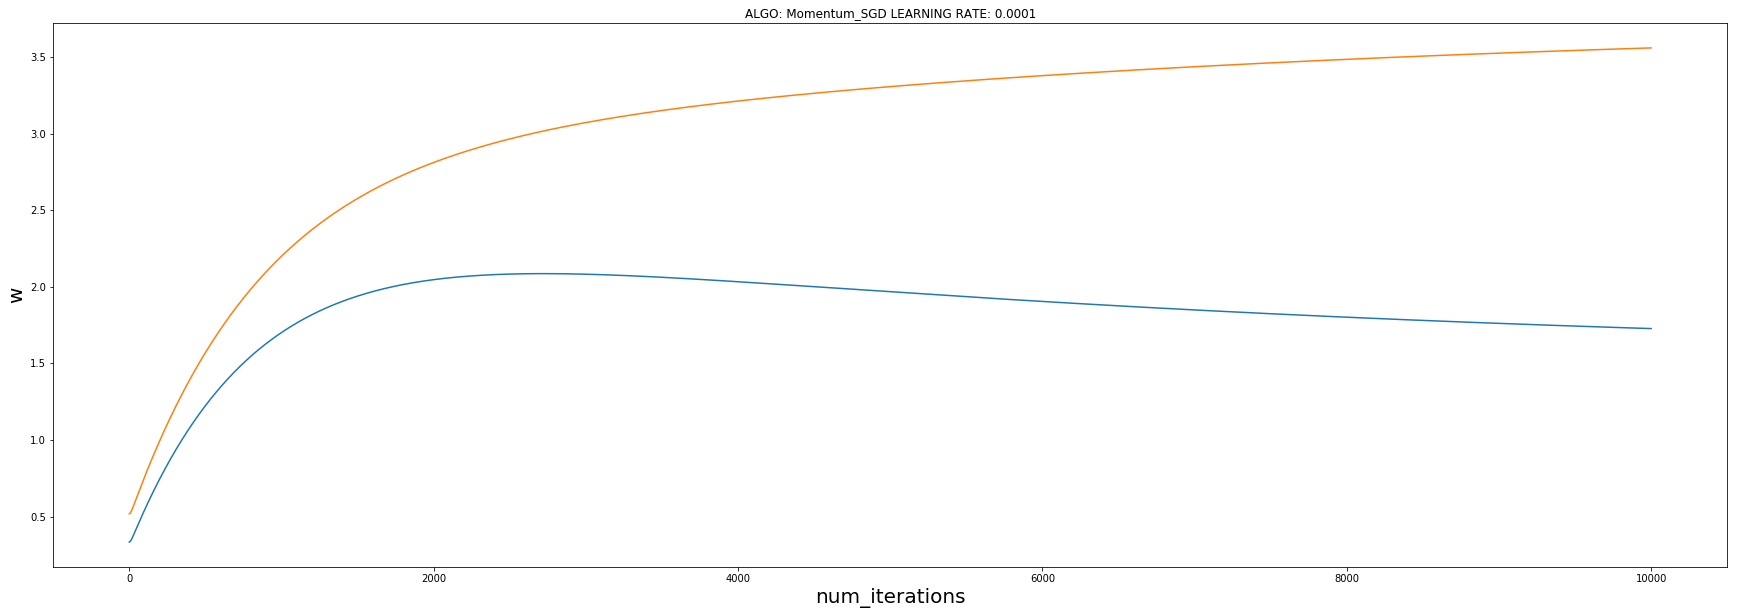

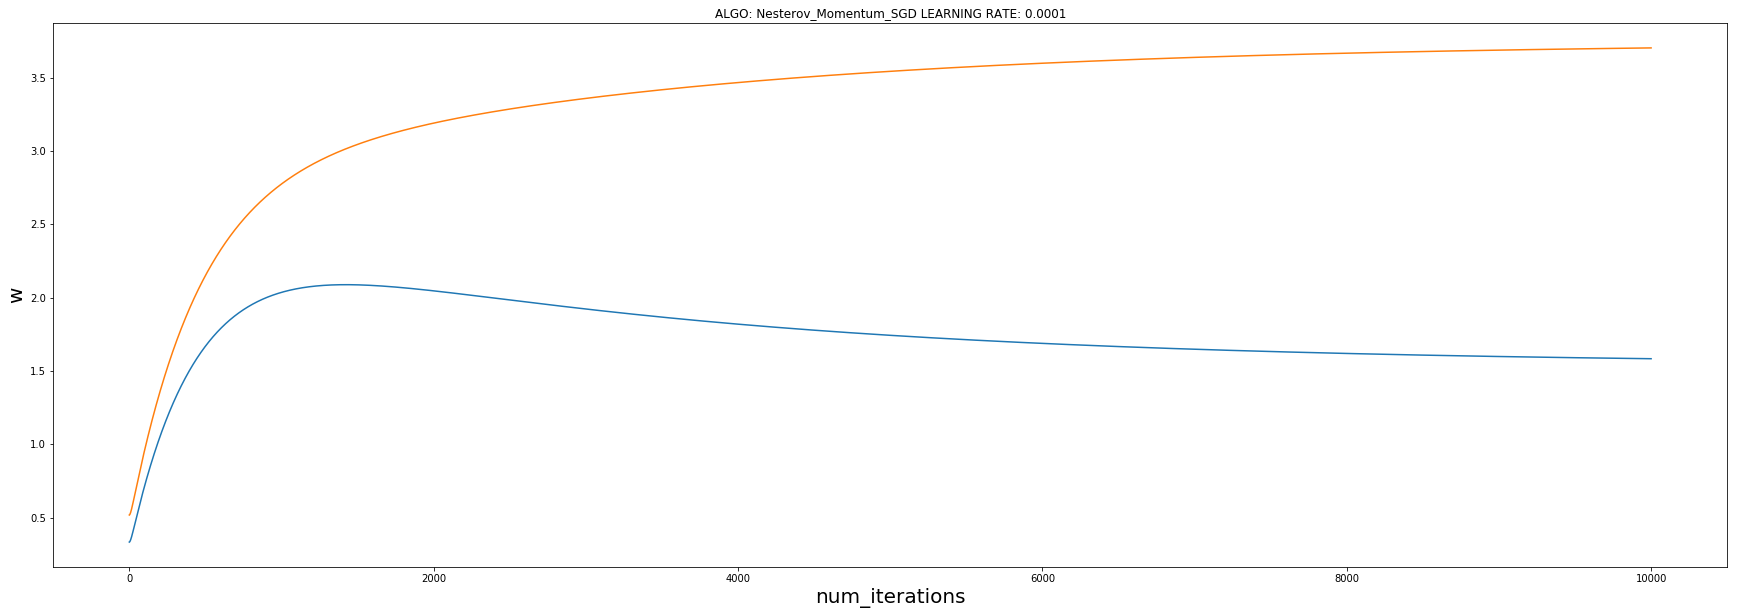

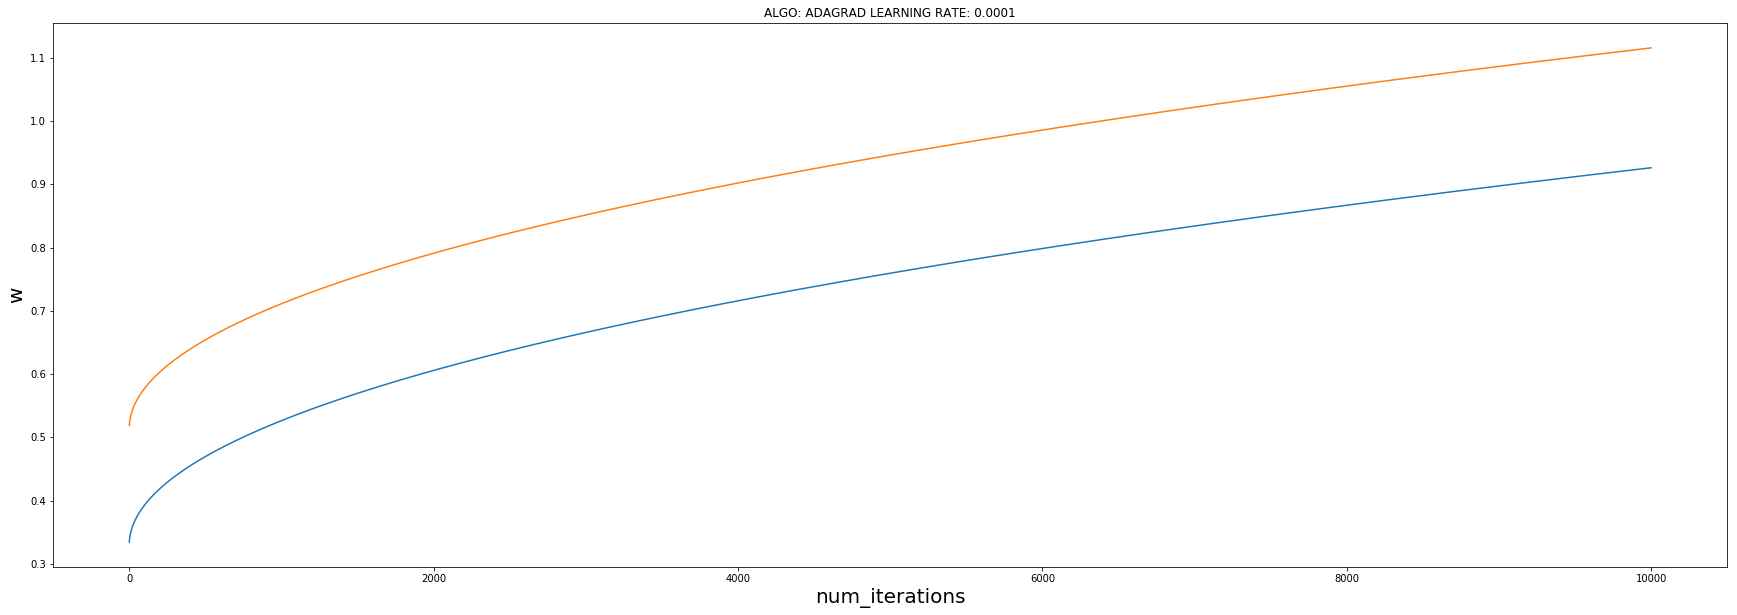

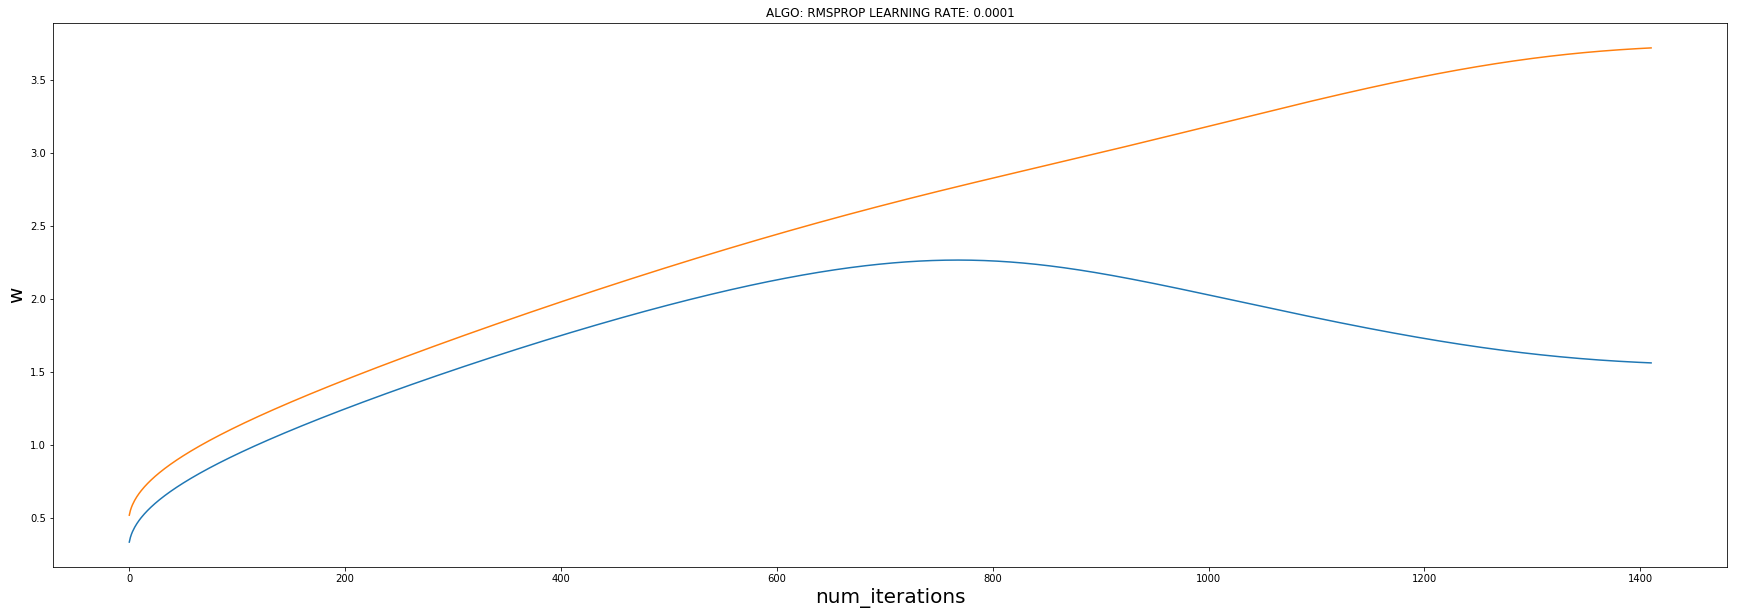

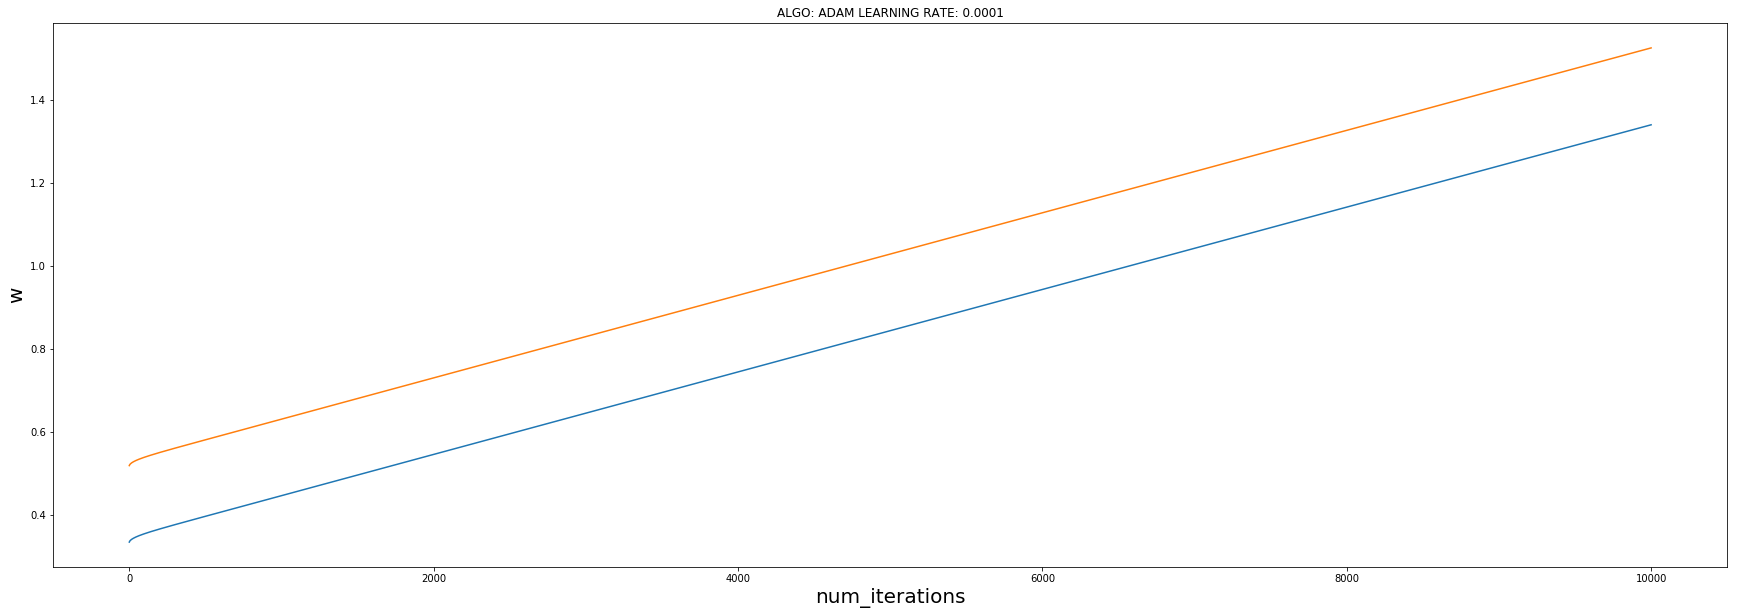

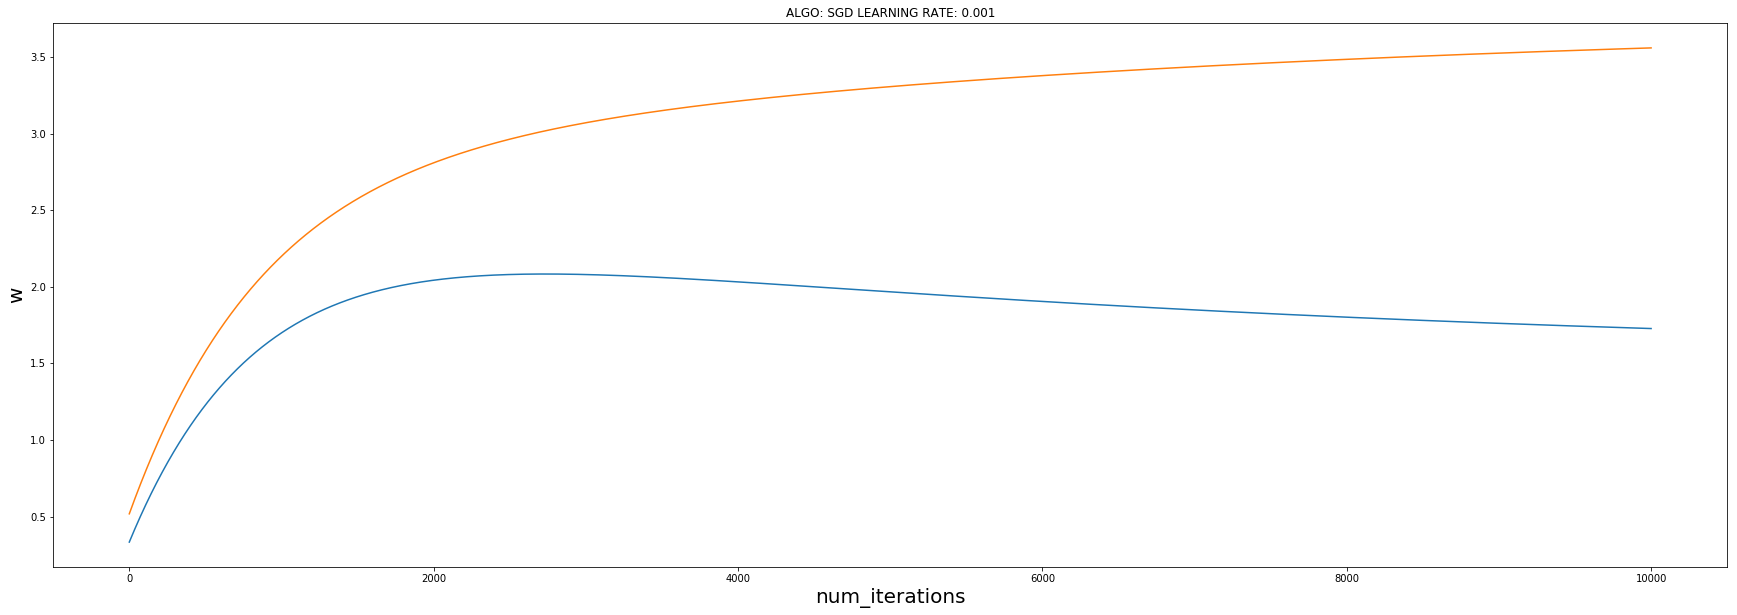

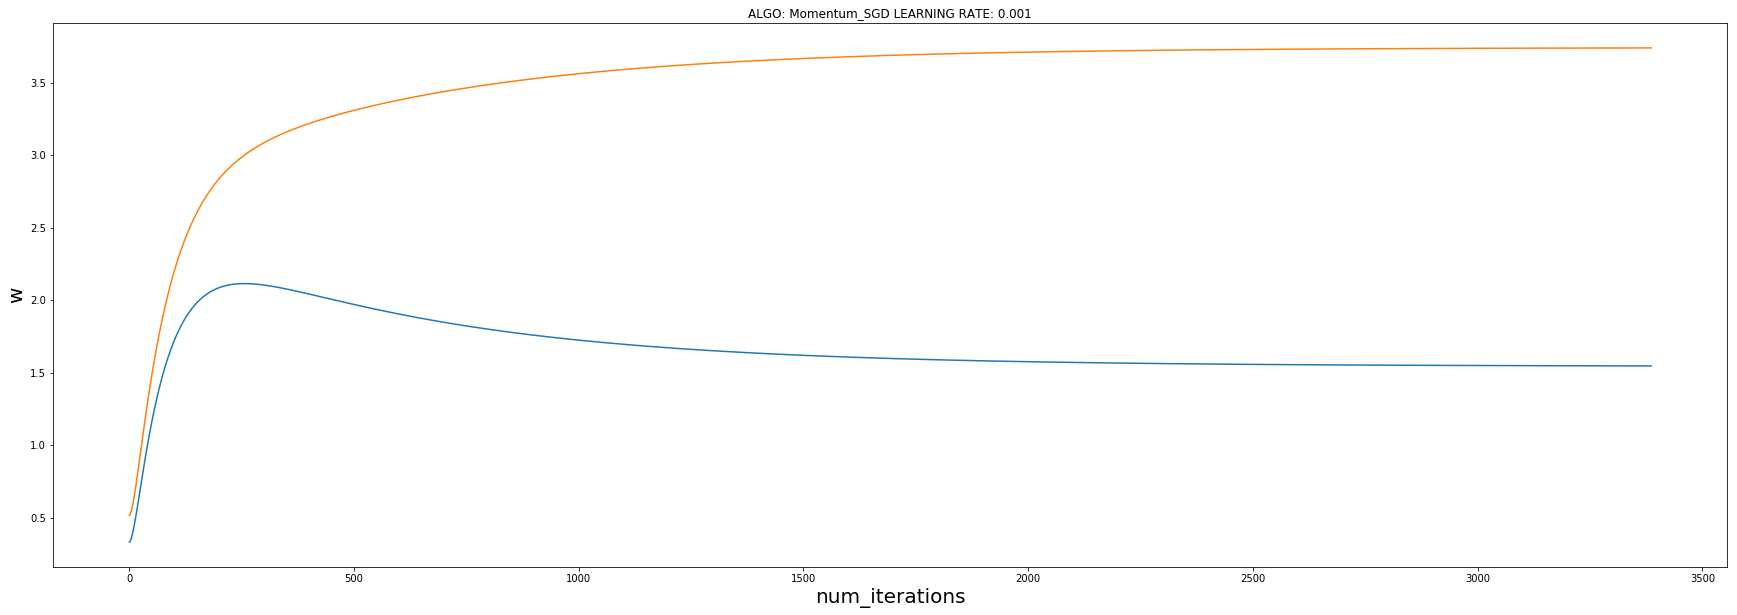

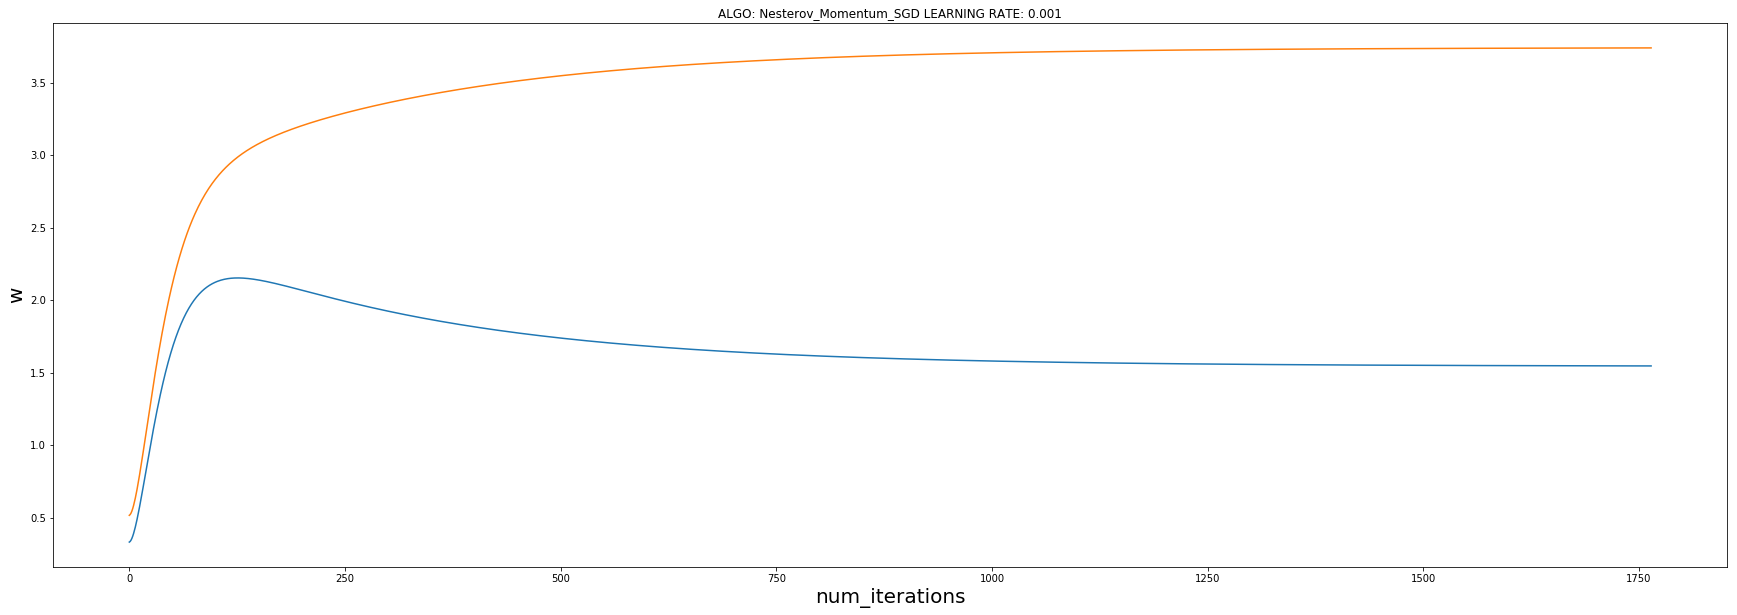

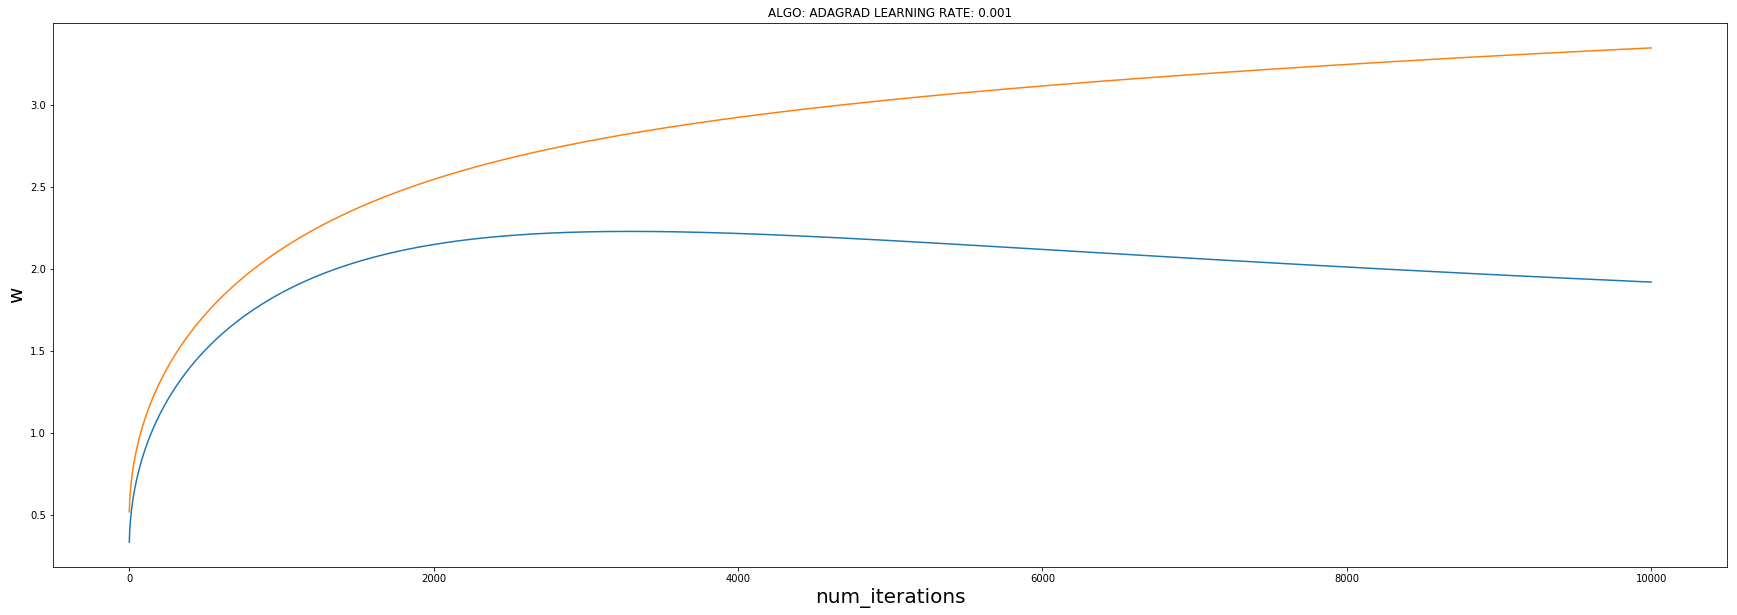

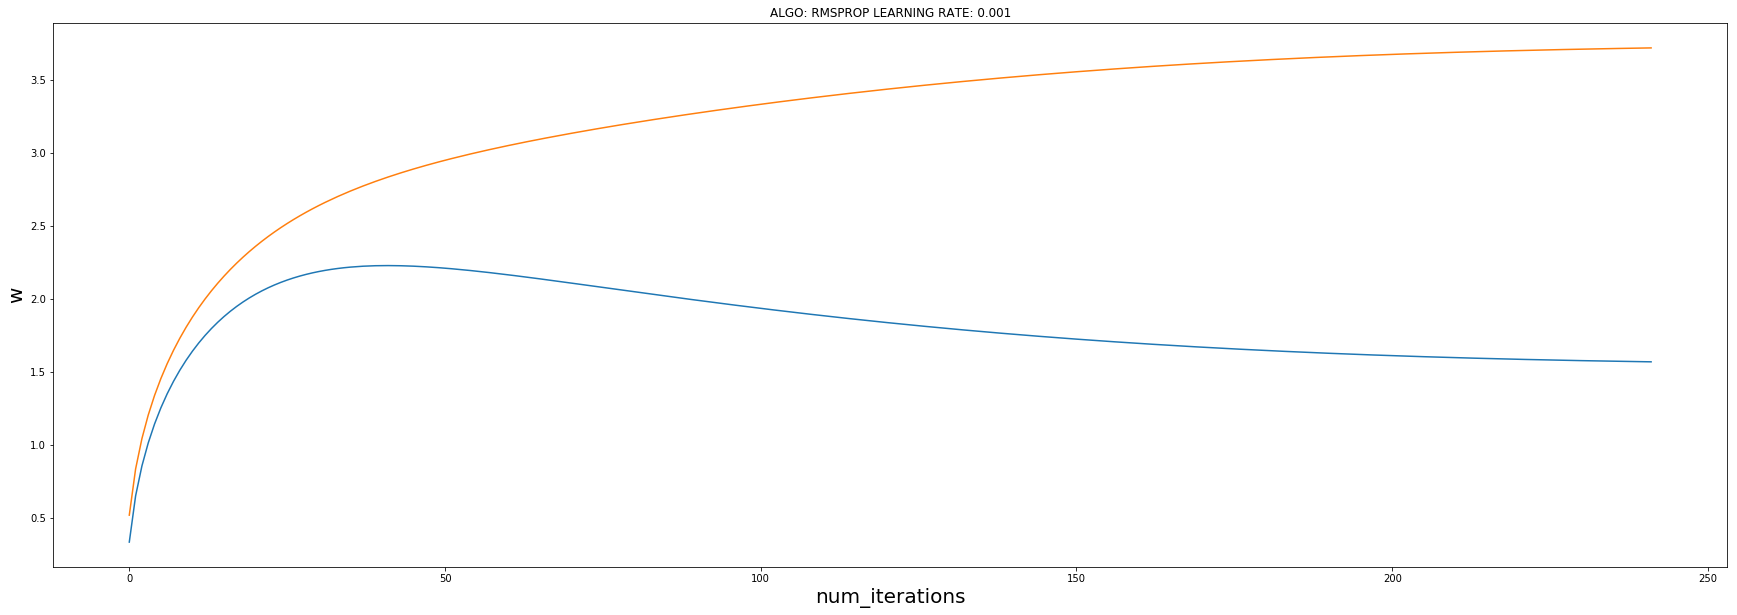

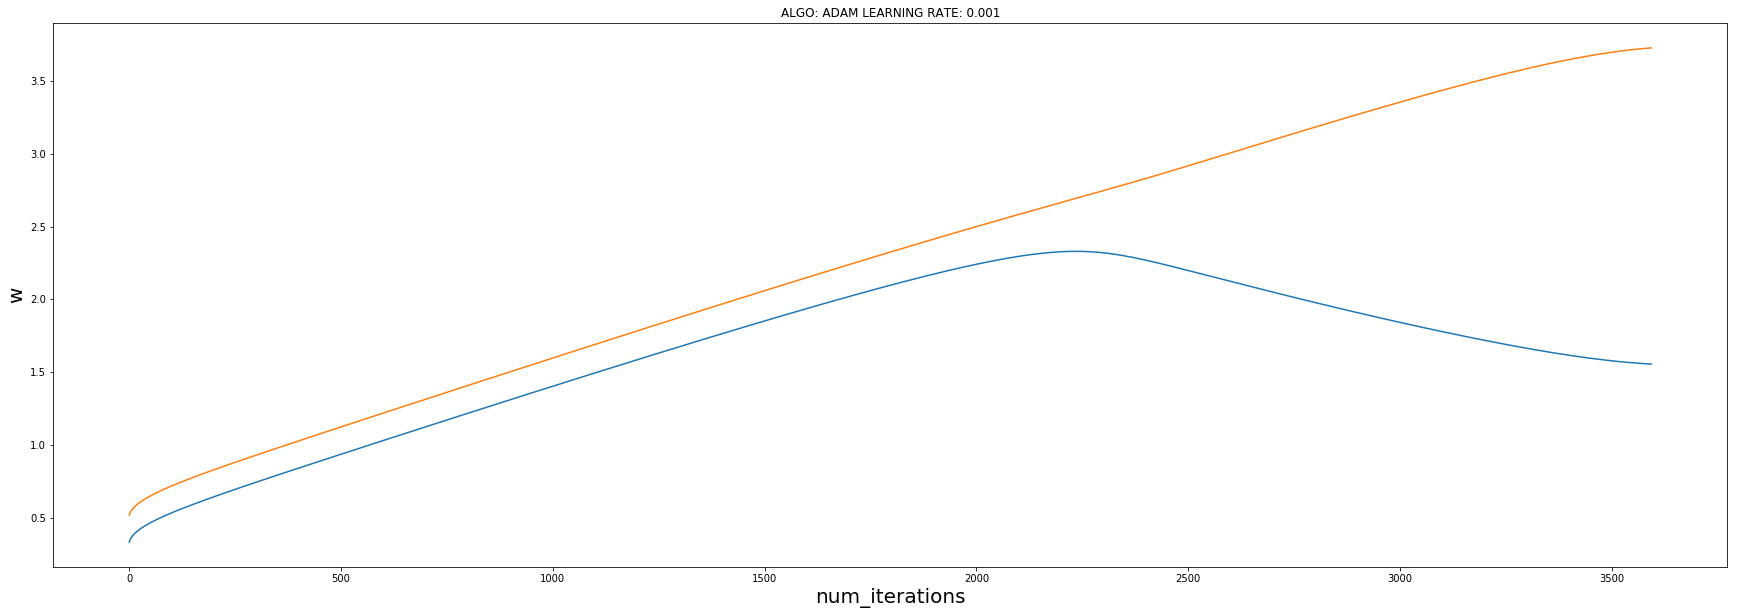

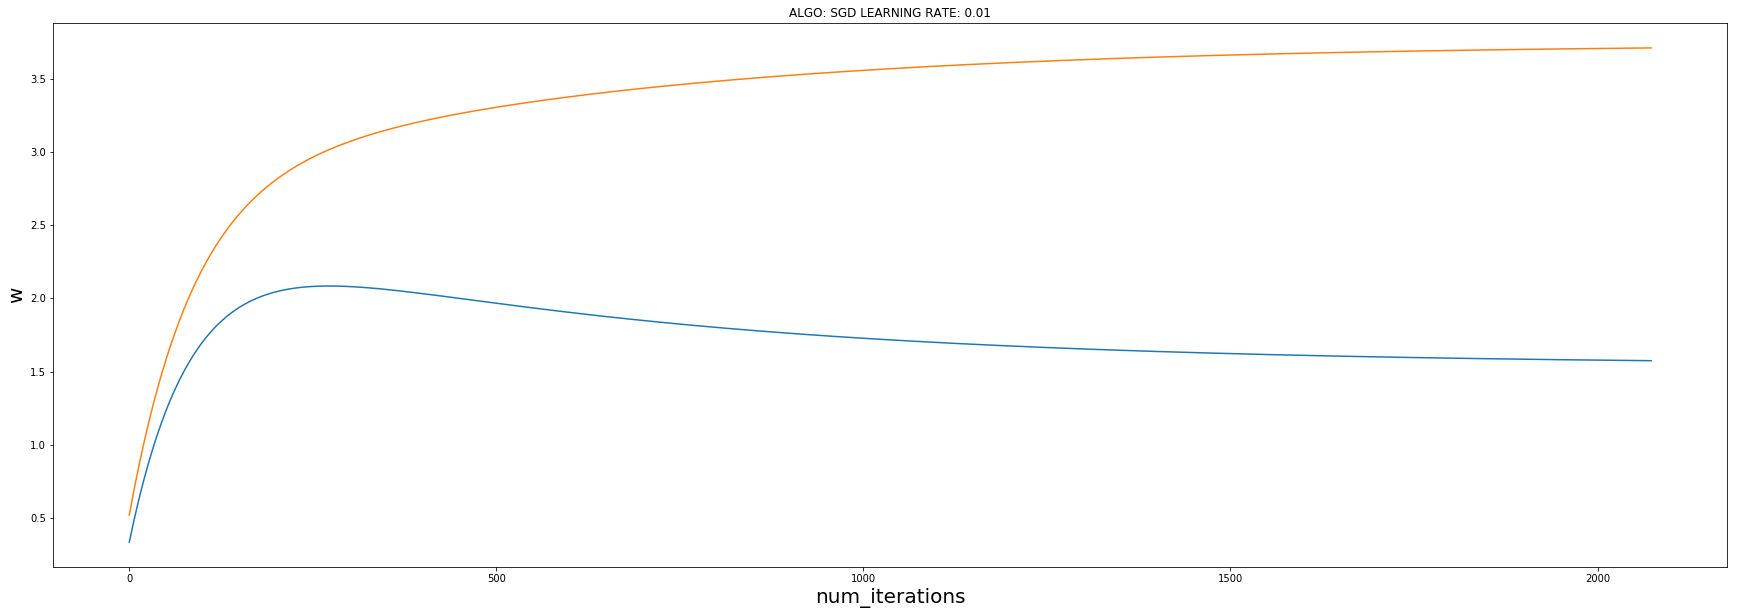

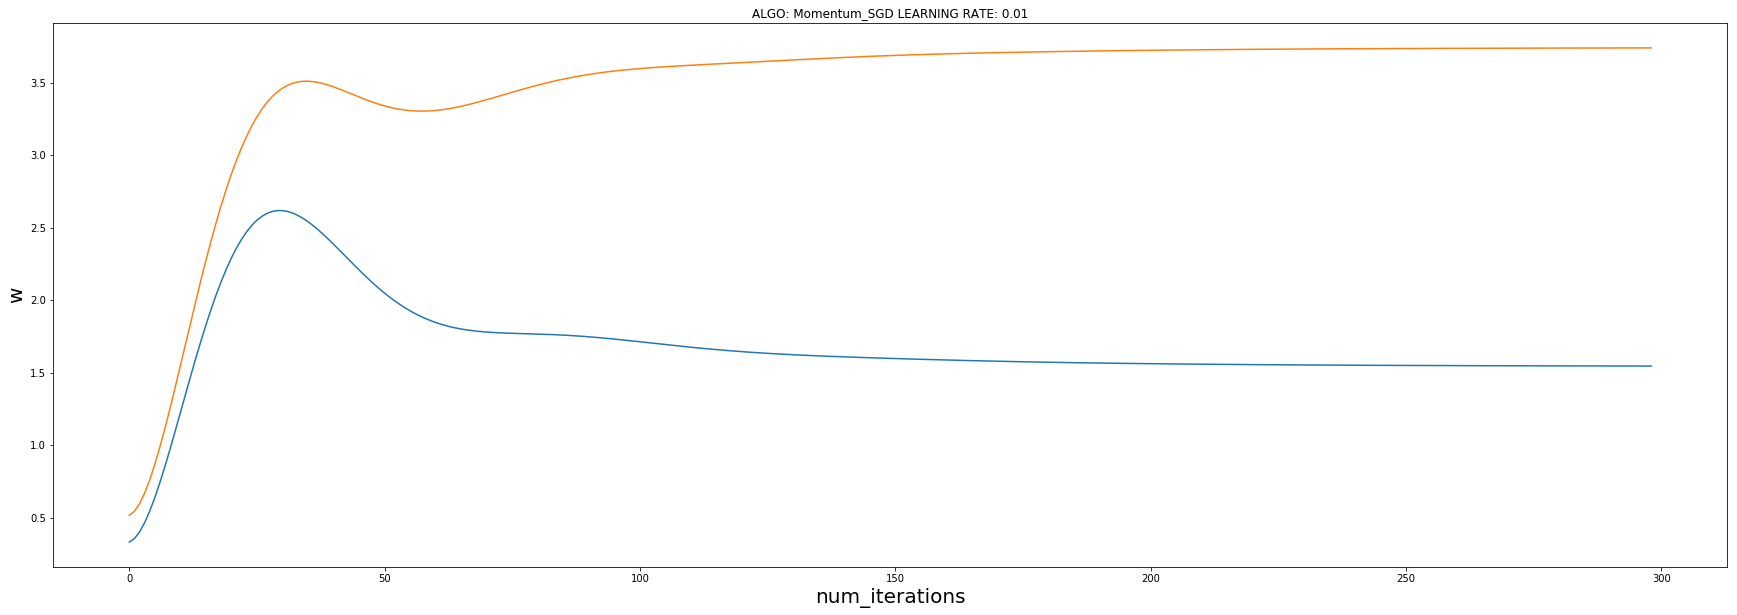

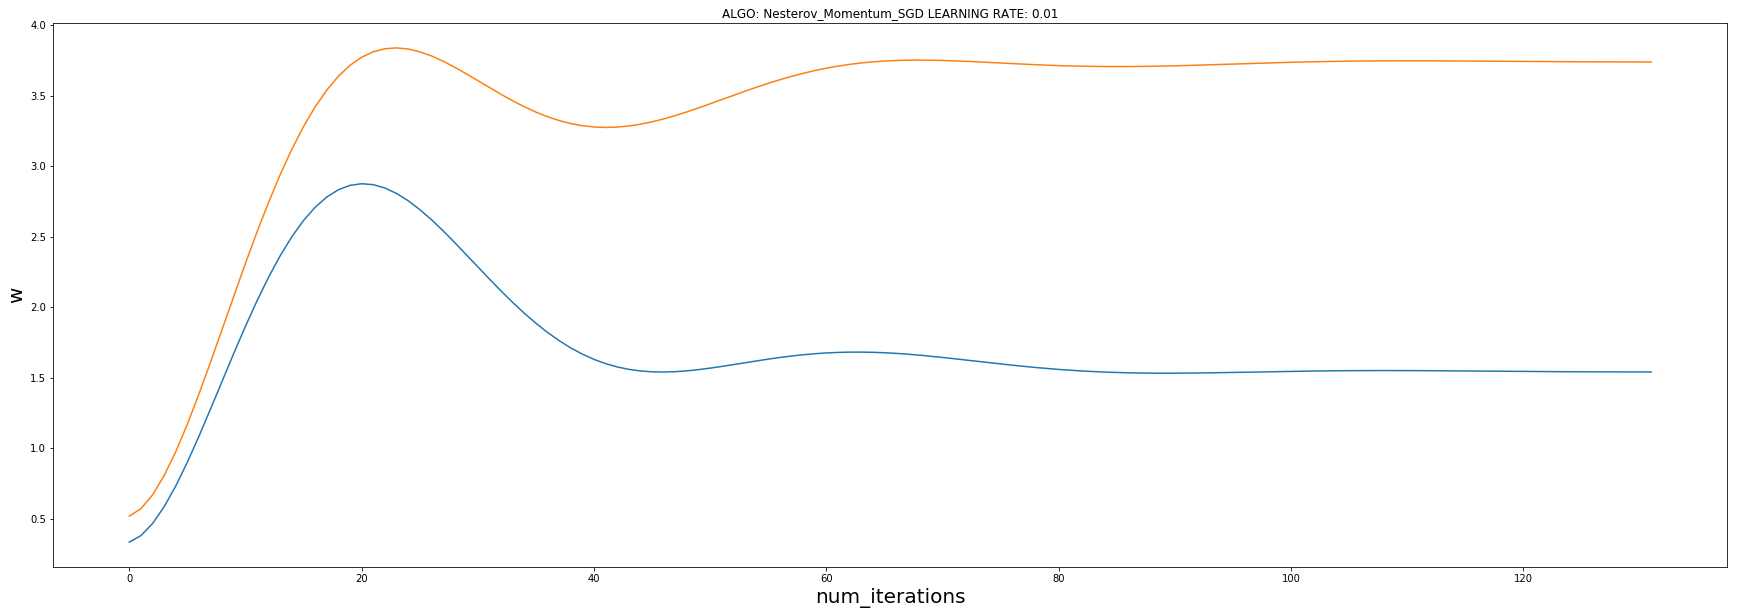

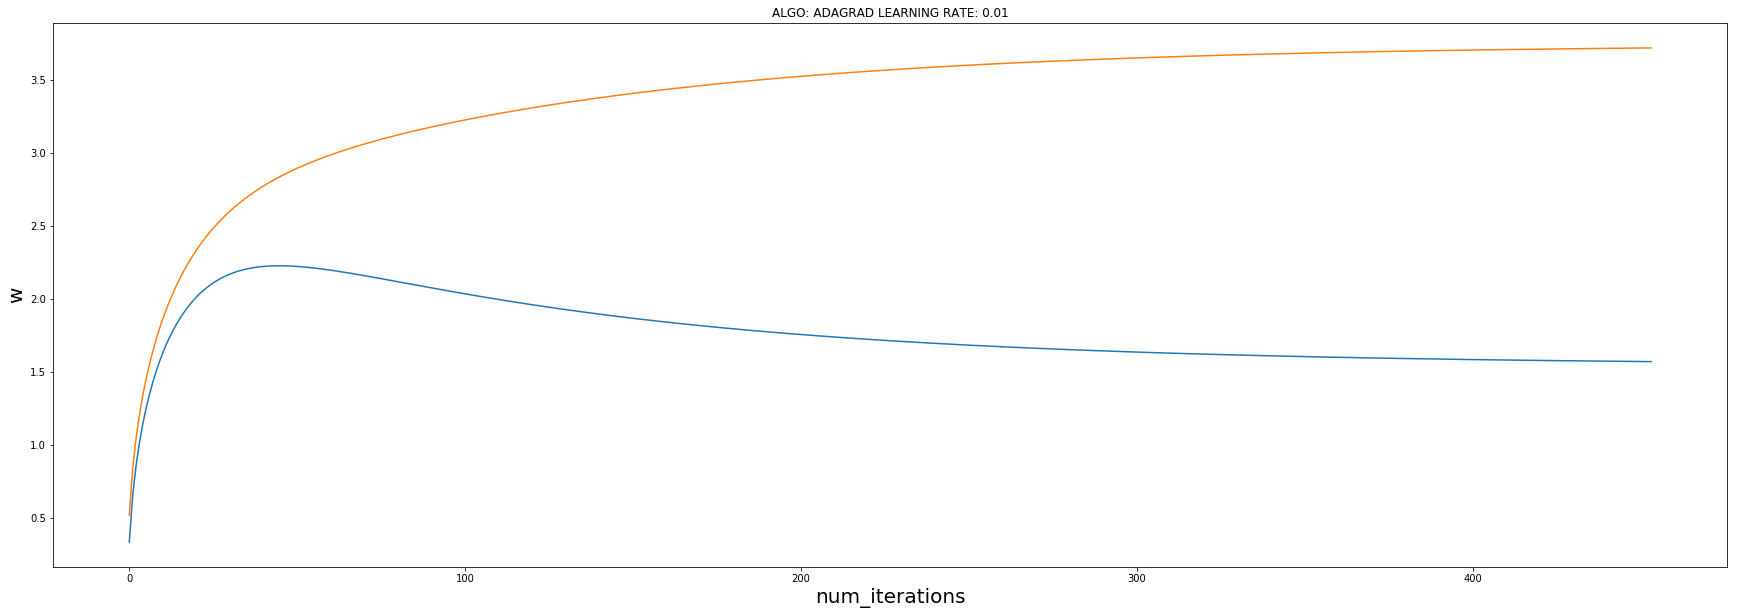

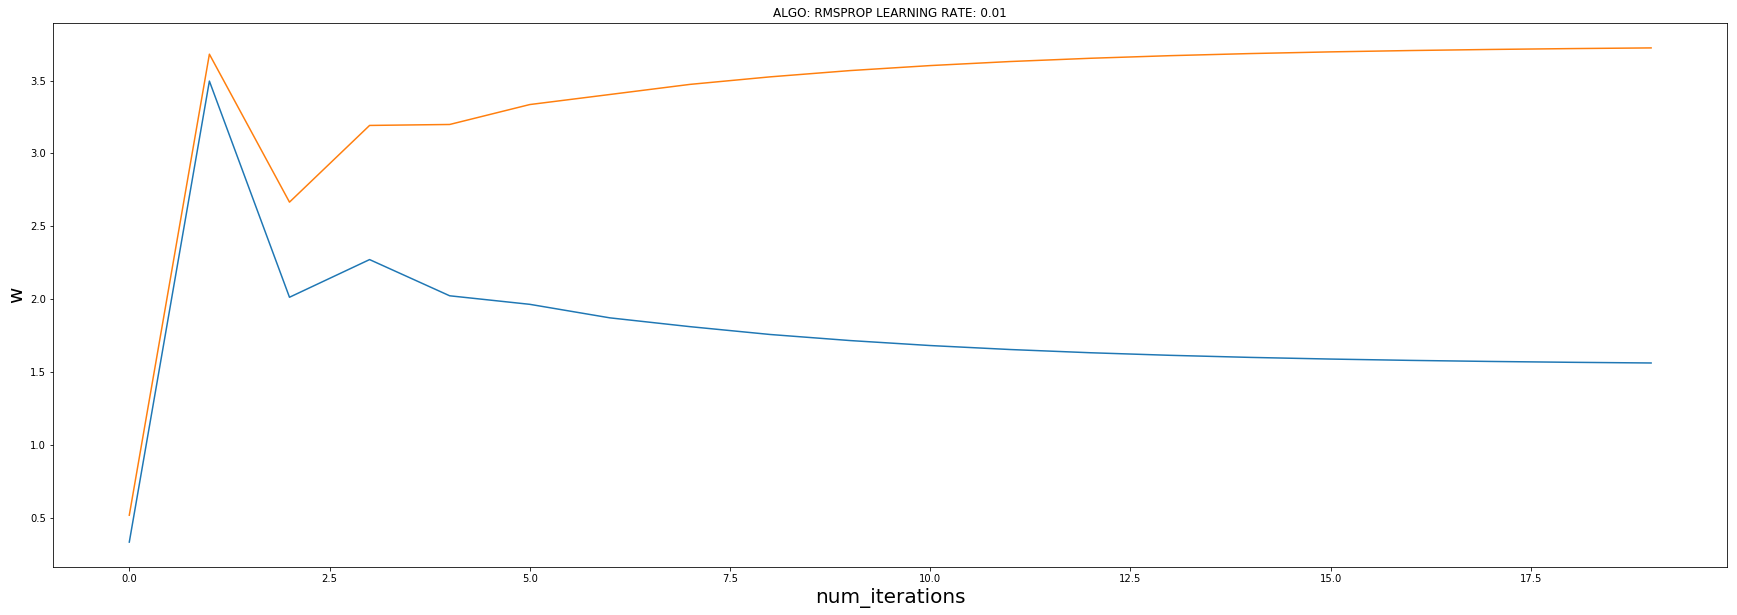

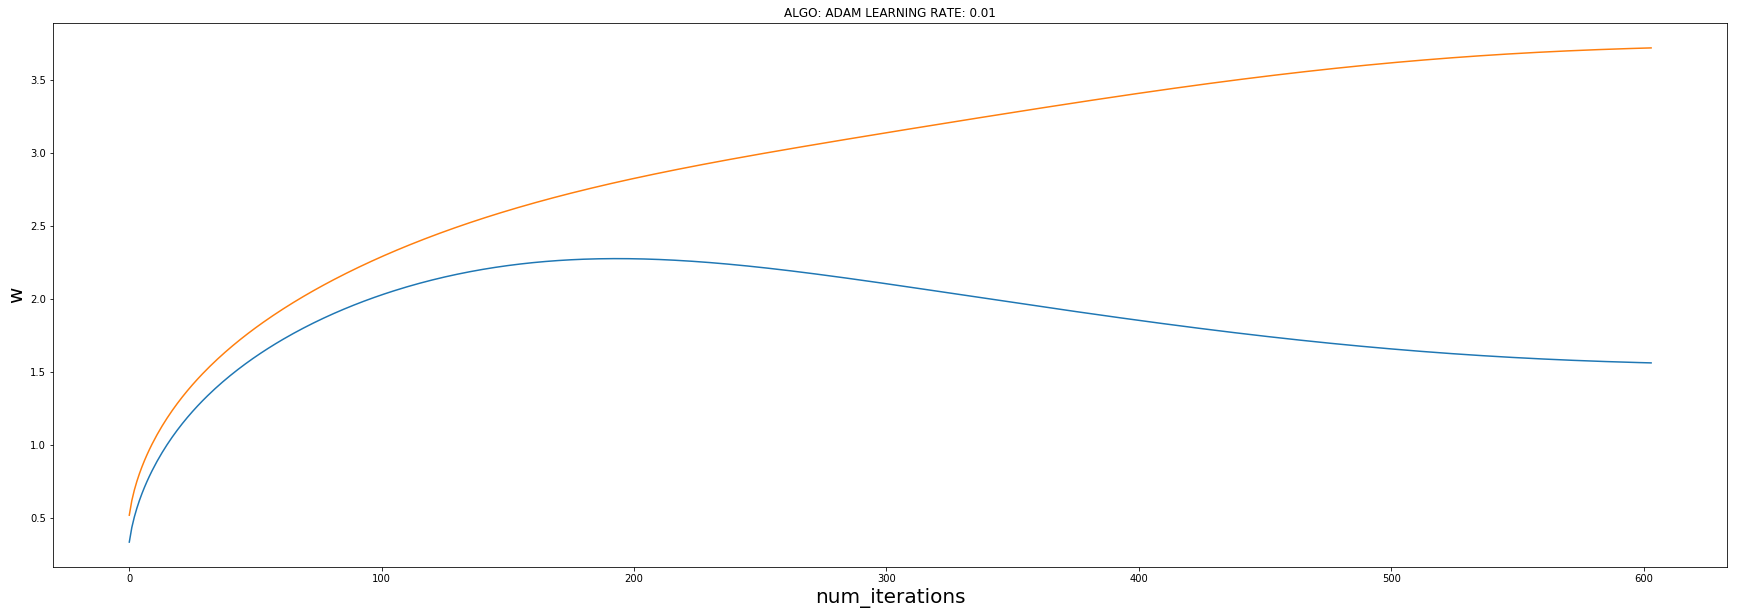

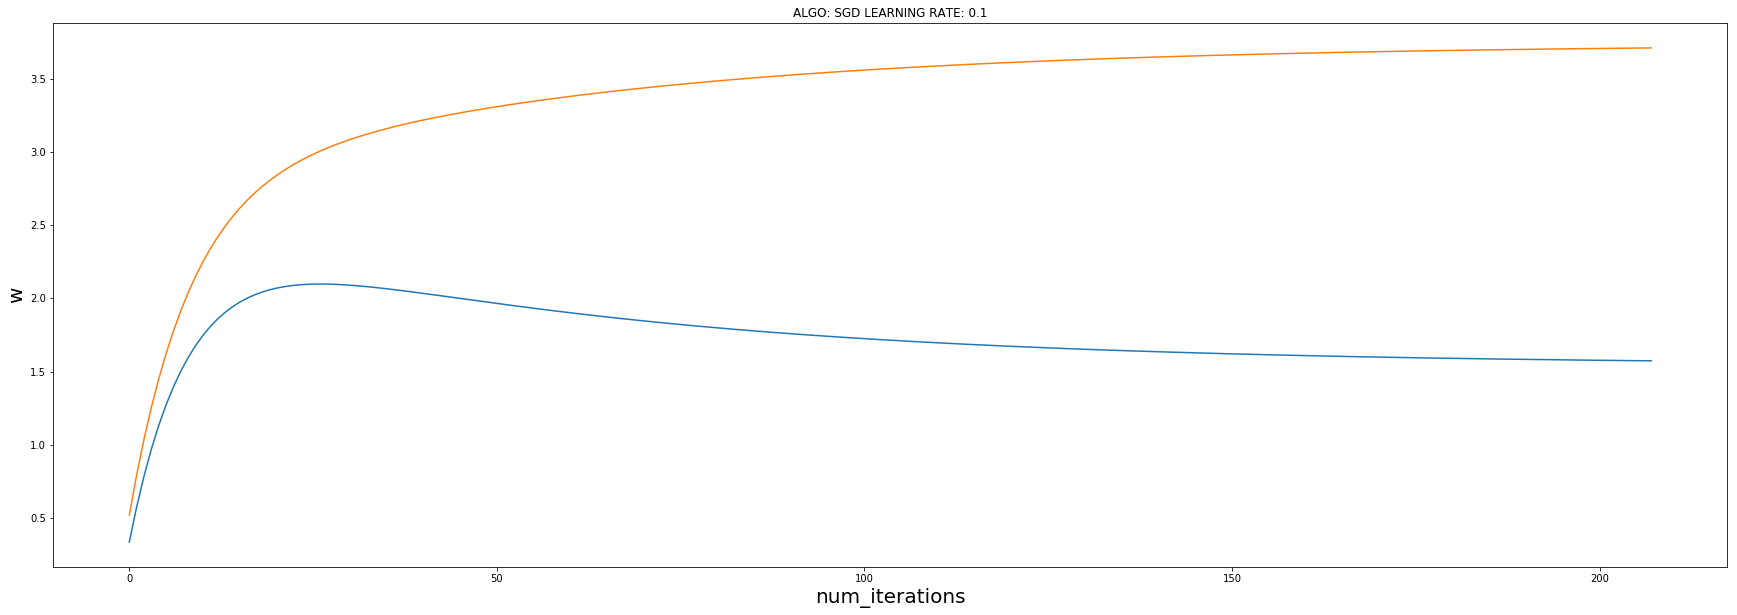

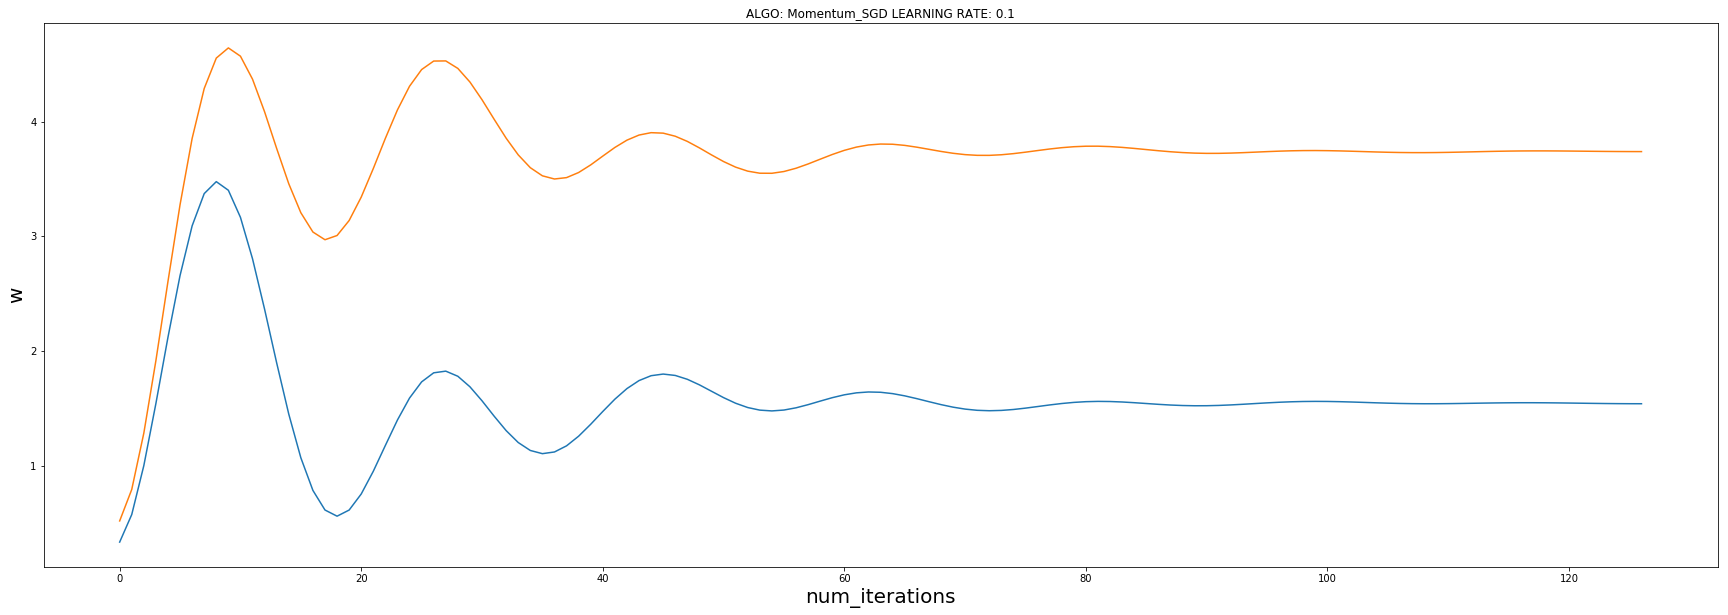

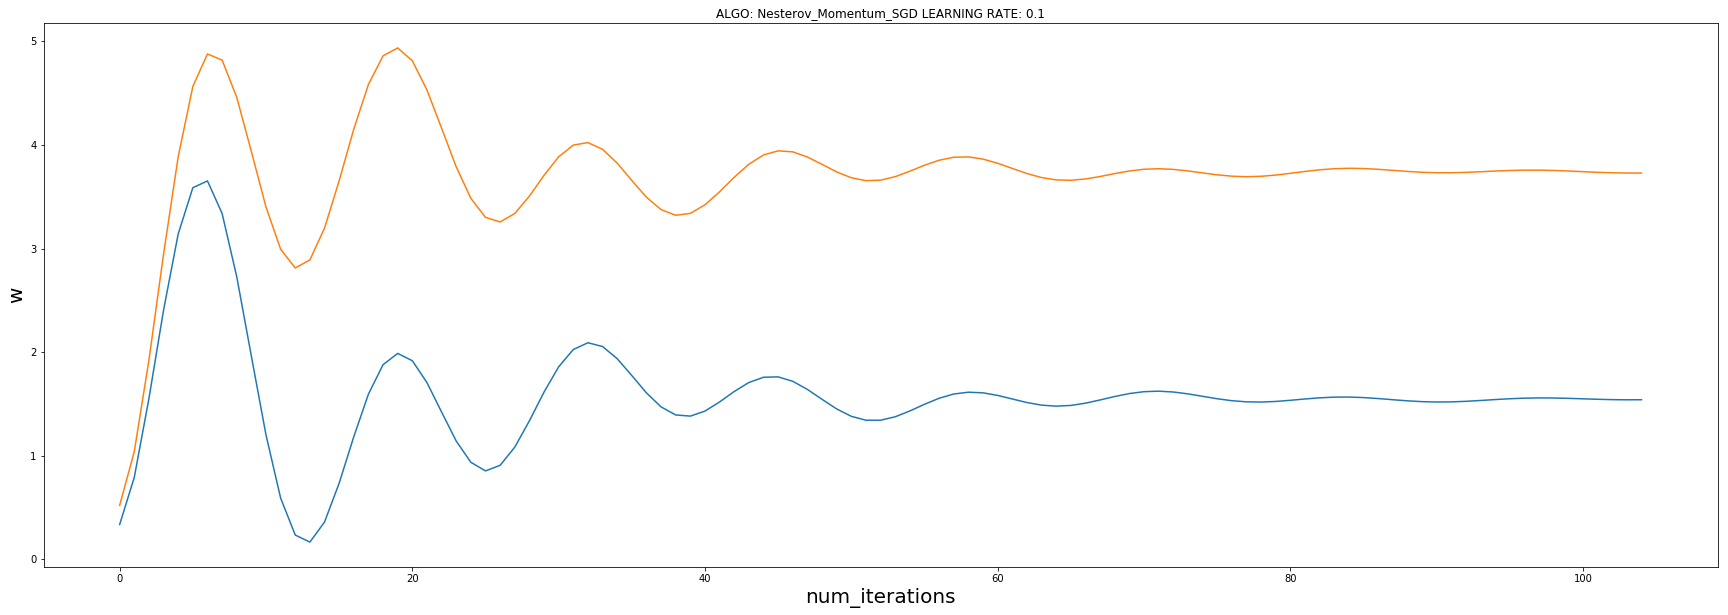

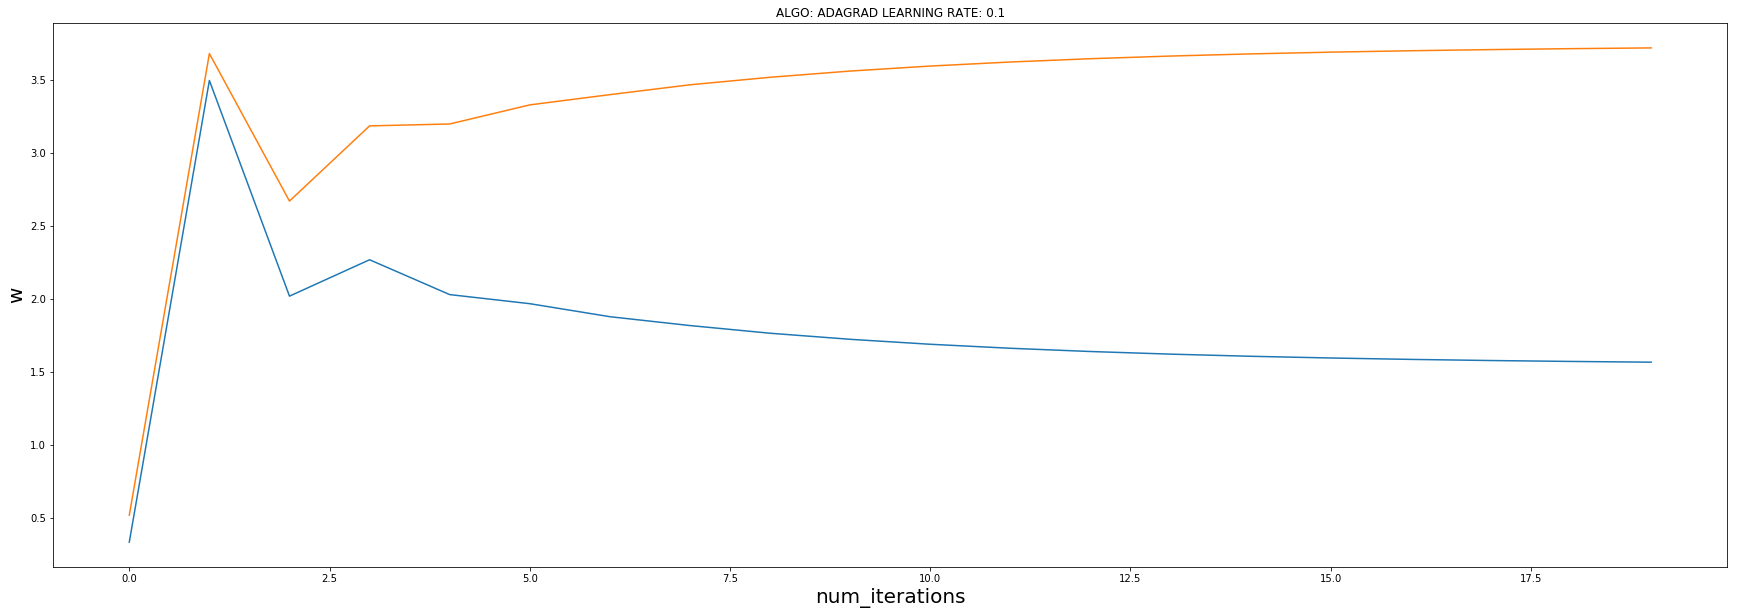

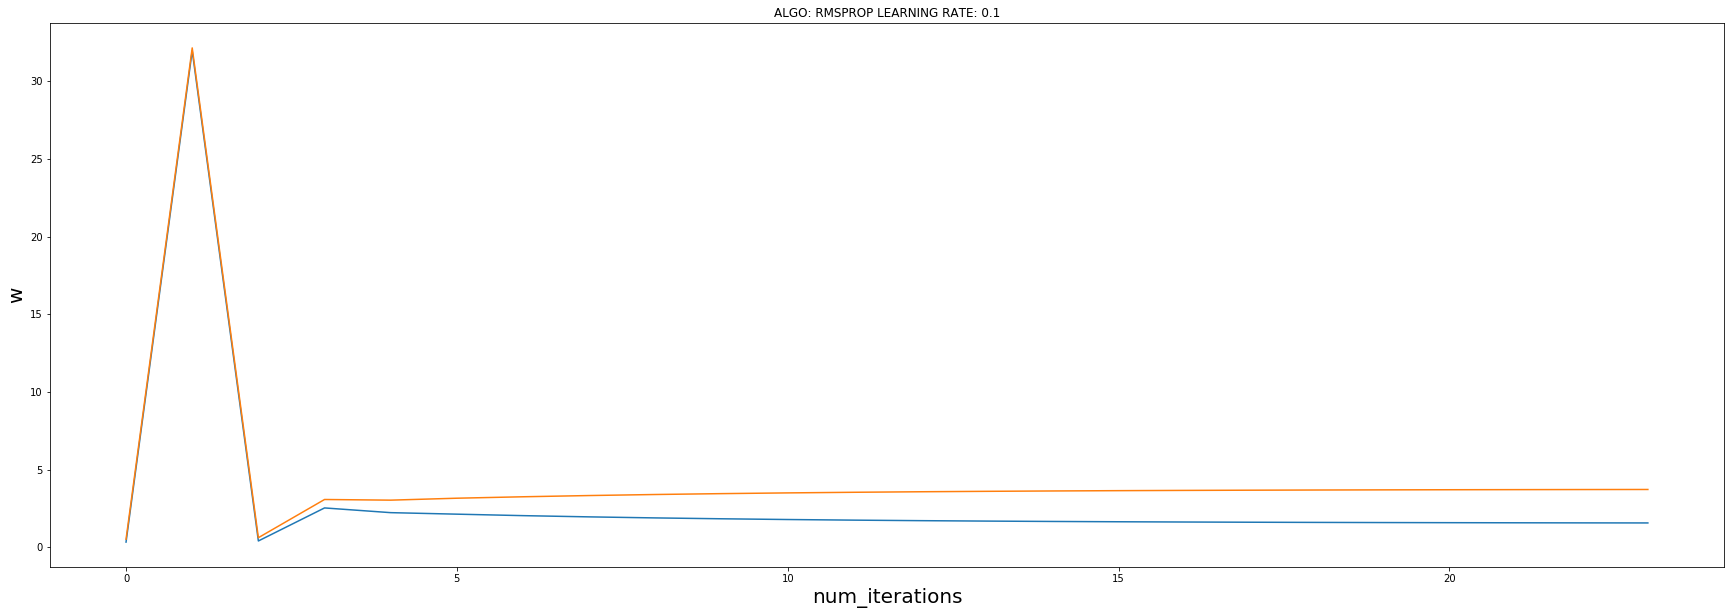

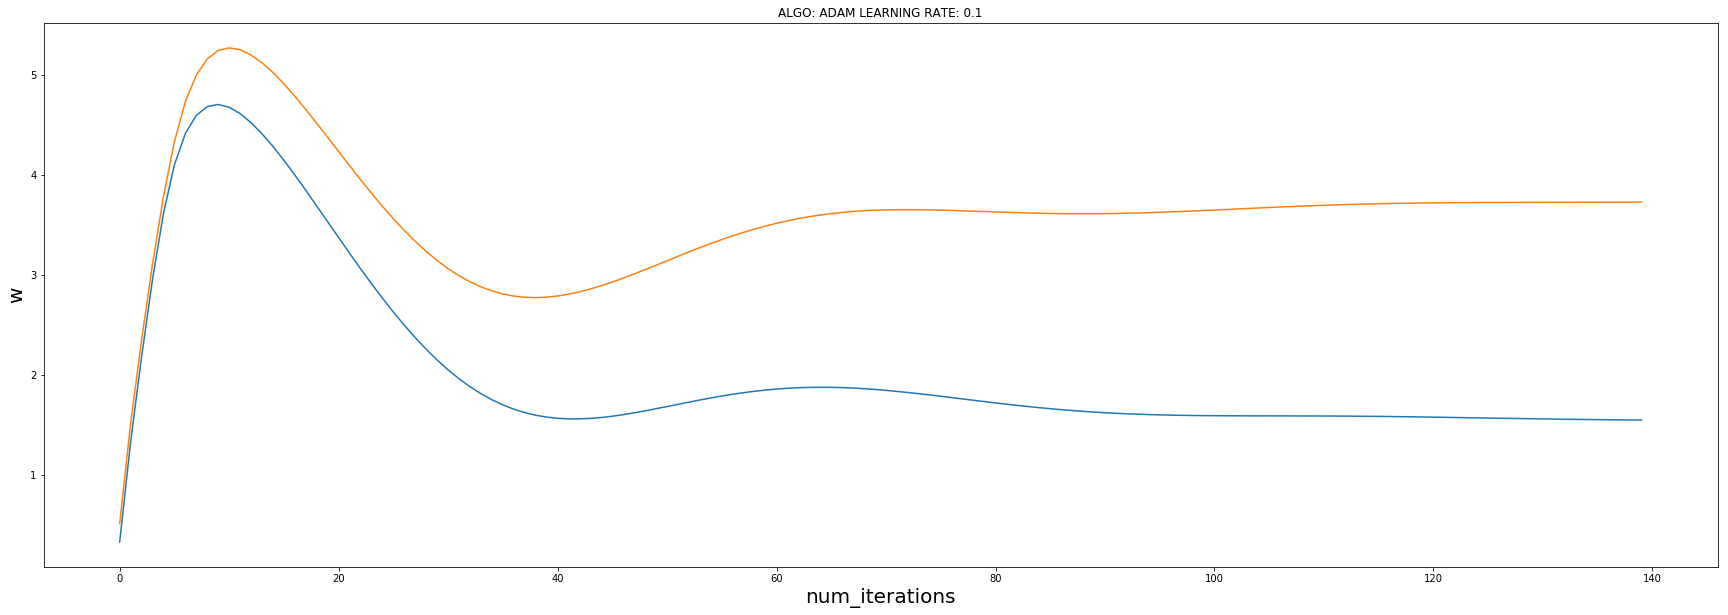

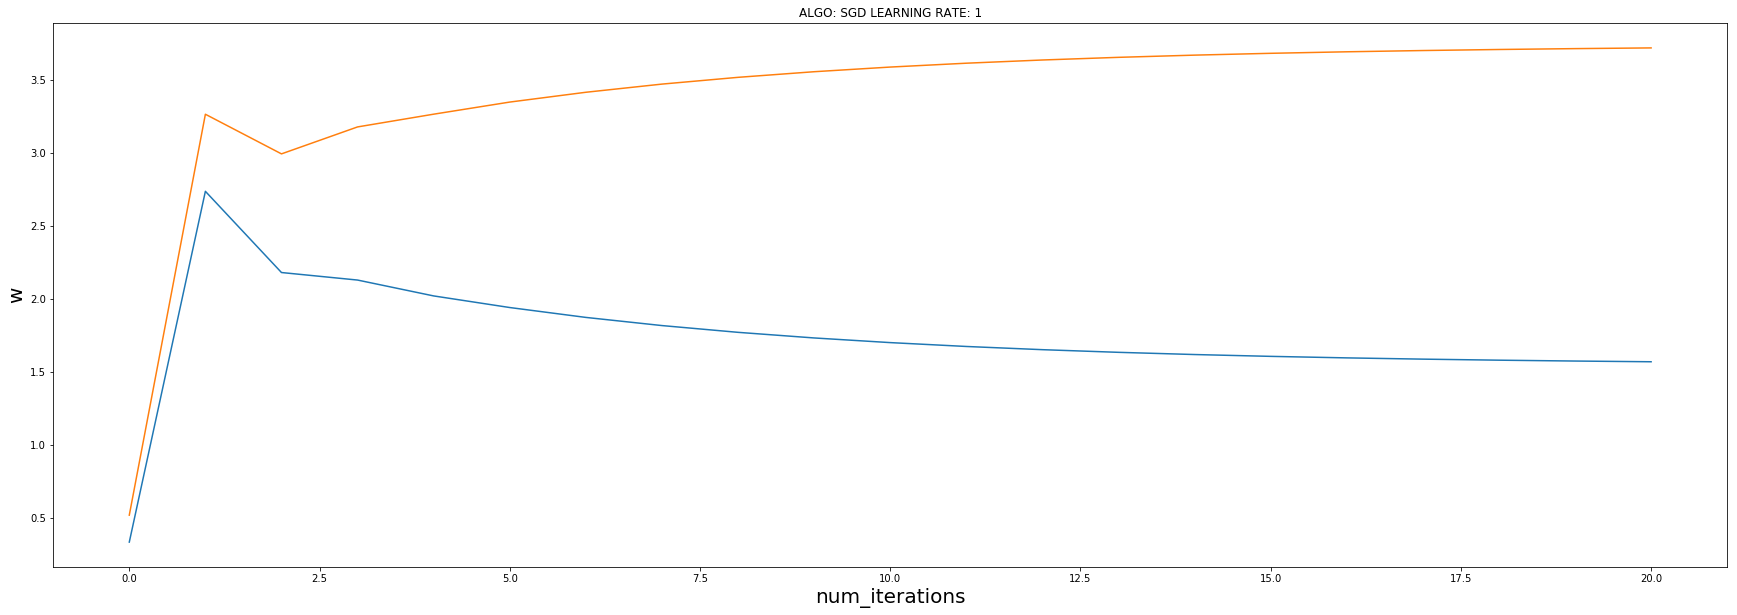

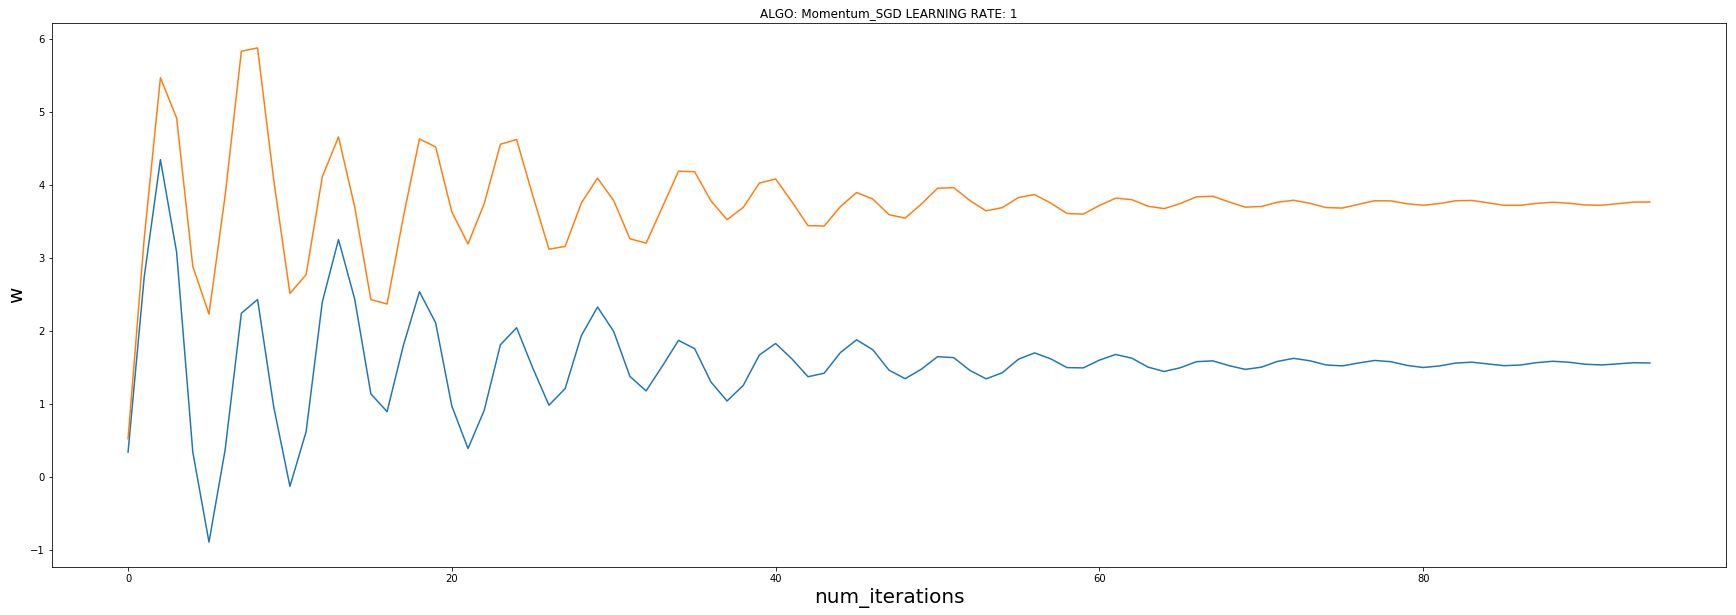

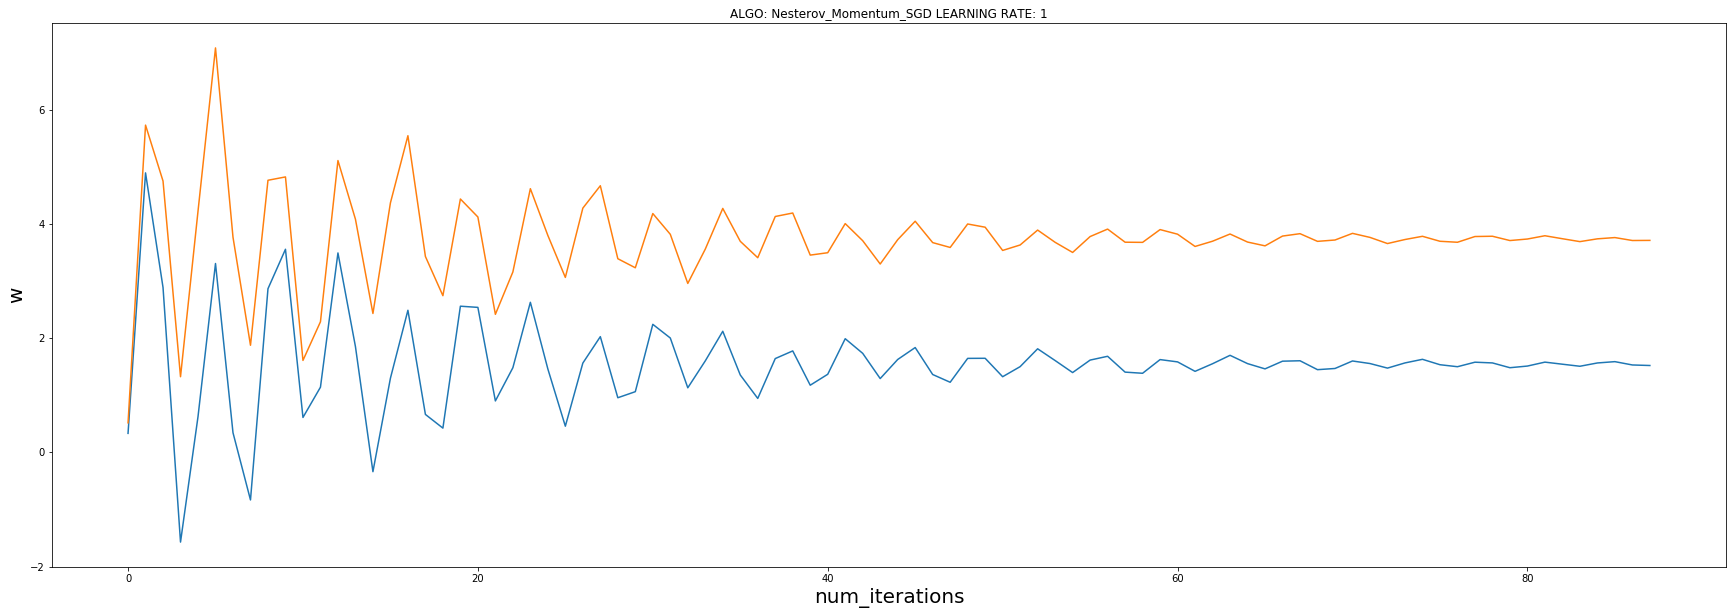

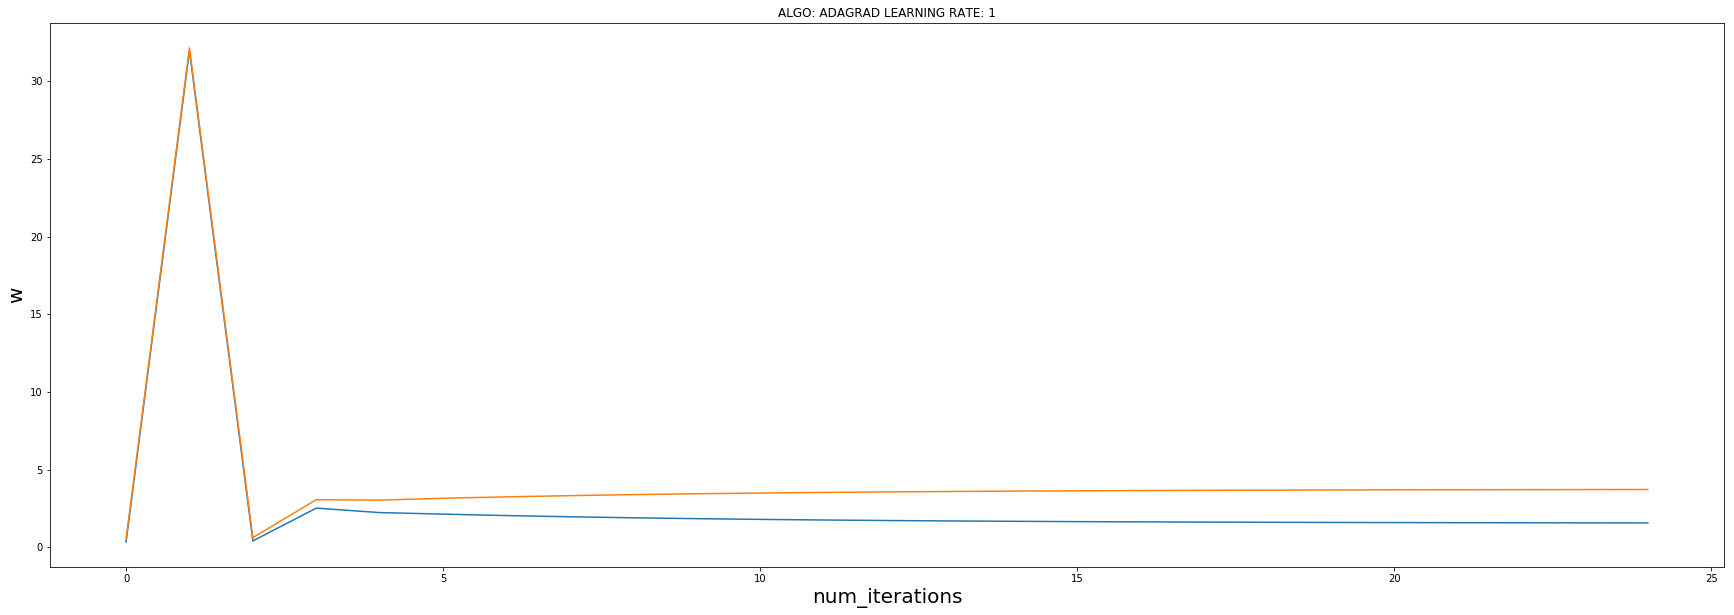

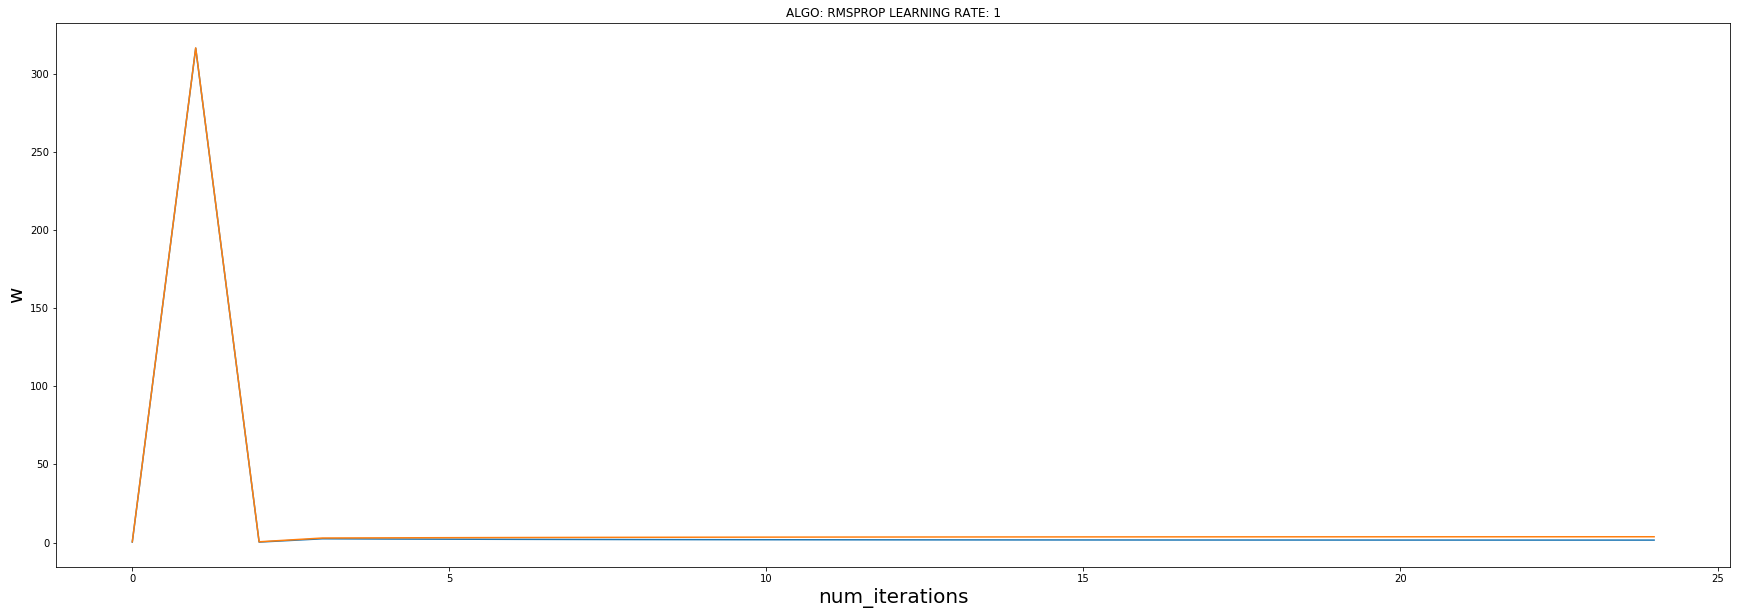

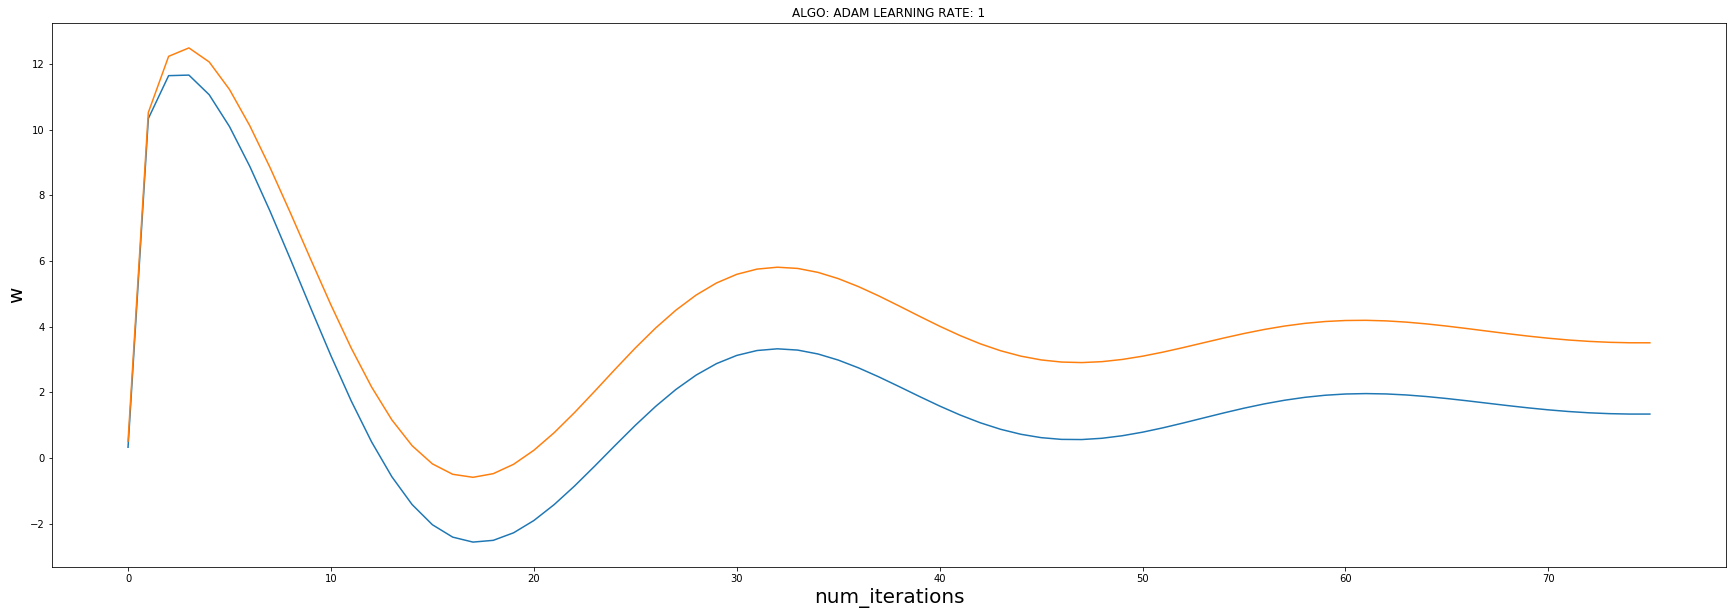

In [17]:
for each_learning_rate in lst_of_learning_rates:
    for each_algo in order:
        plt.figure(figsize=(30, 10))
        viz_ws = dict_w_learning_rates[each_learning_rate][each_algo]
        #print "ALGO: {} learning rate: {}".format(each_algo, each_learning_rate)
        plt.title('ALGO: {} LEARNING RATE: {}'.format(each_algo, each_learning_rate))
        plt.plot([i for i, _ in enumerate(viz_ws)], [x[0] for x in viz_ws])
        plt.plot([i for i, _ in enumerate(viz_ws)], [x[1] for x in viz_ws])
        plt.xlabel('num_iterations', fontsize=20)
        plt.ylabel('w', fontsize=20)
        plt.show()

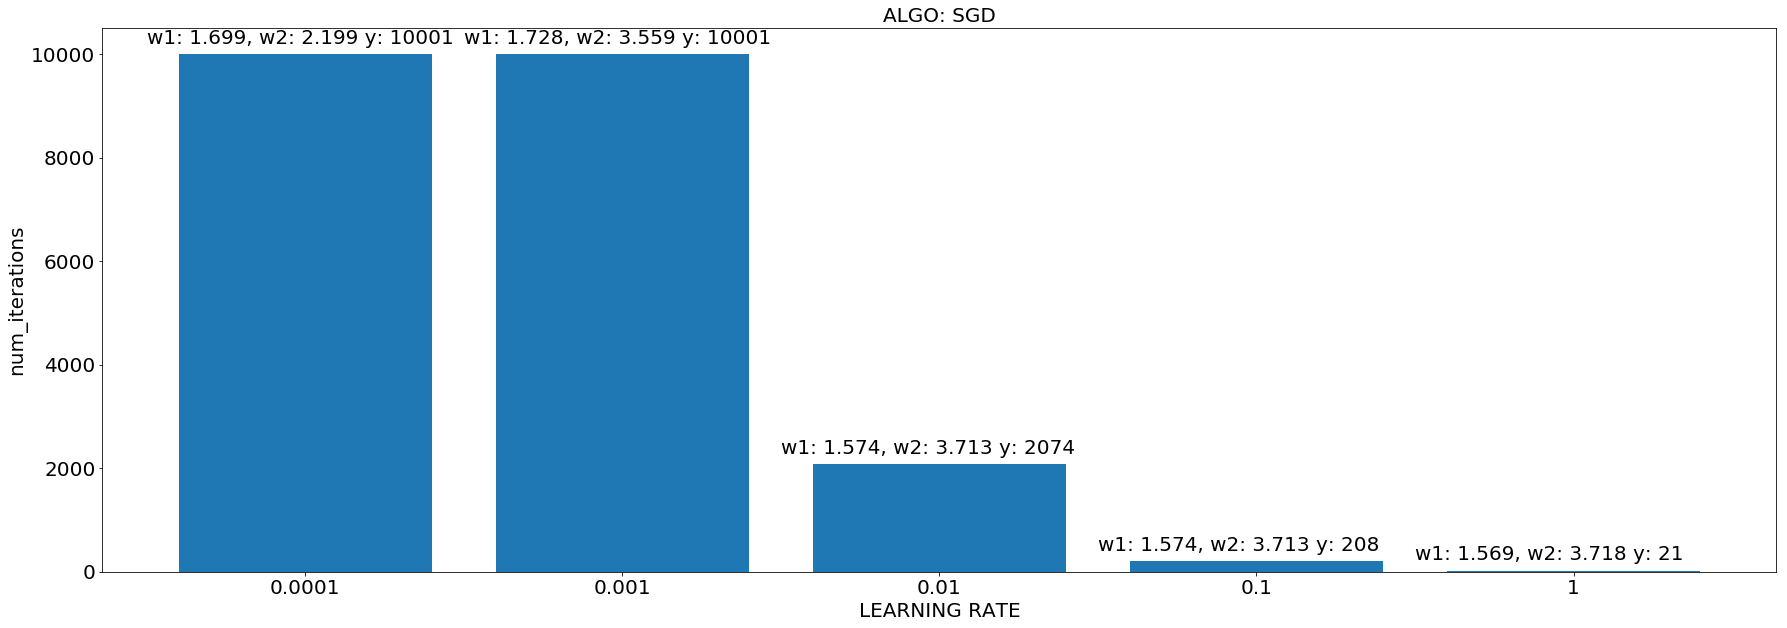

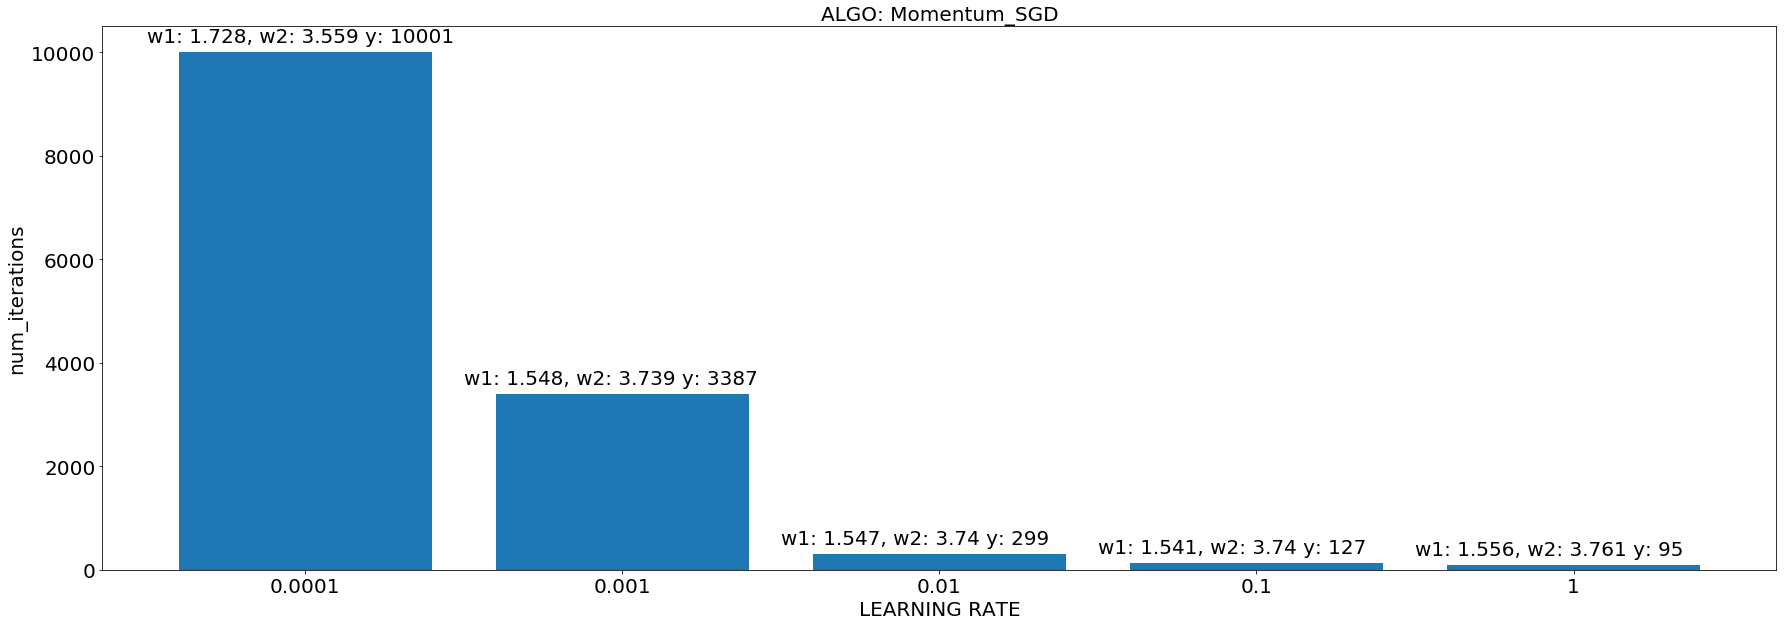

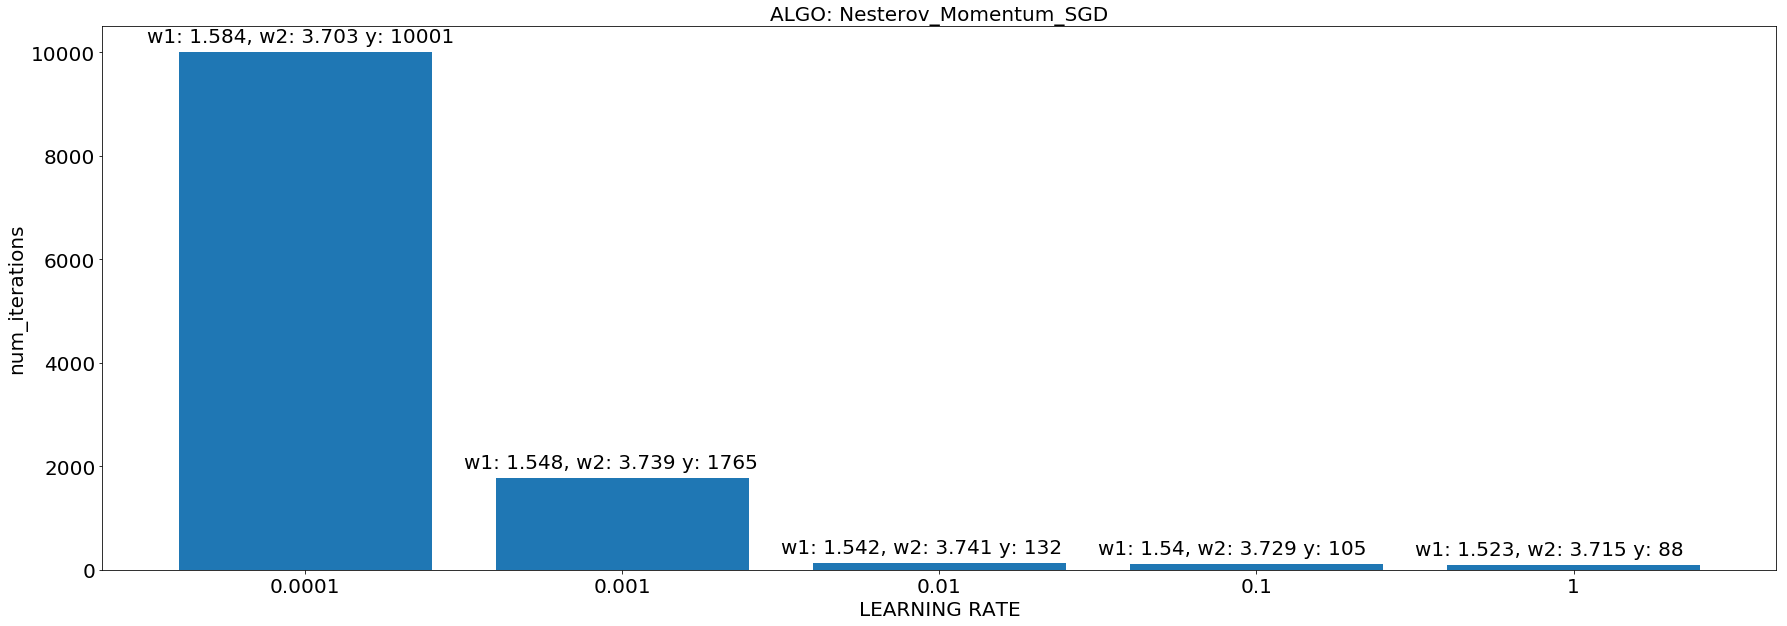

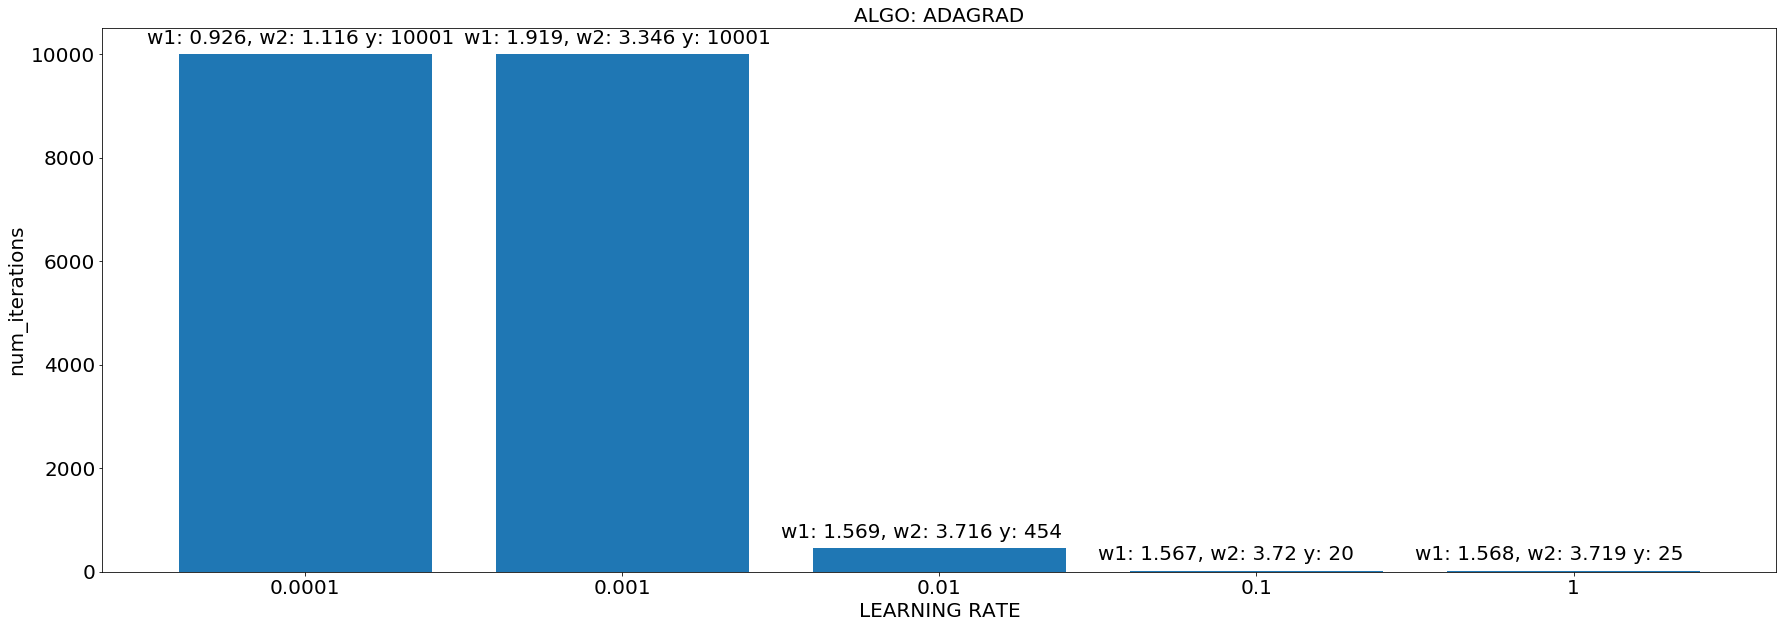

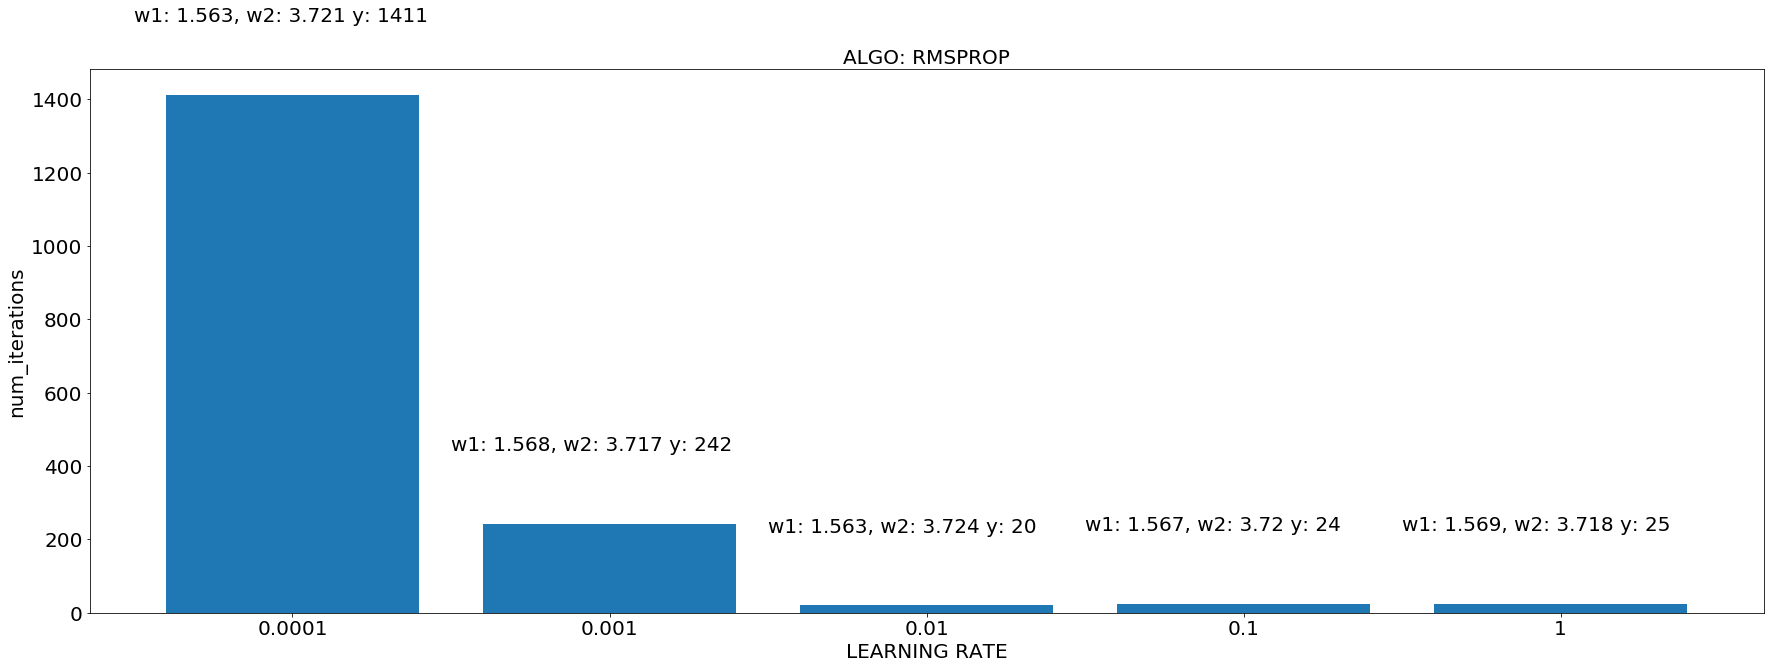

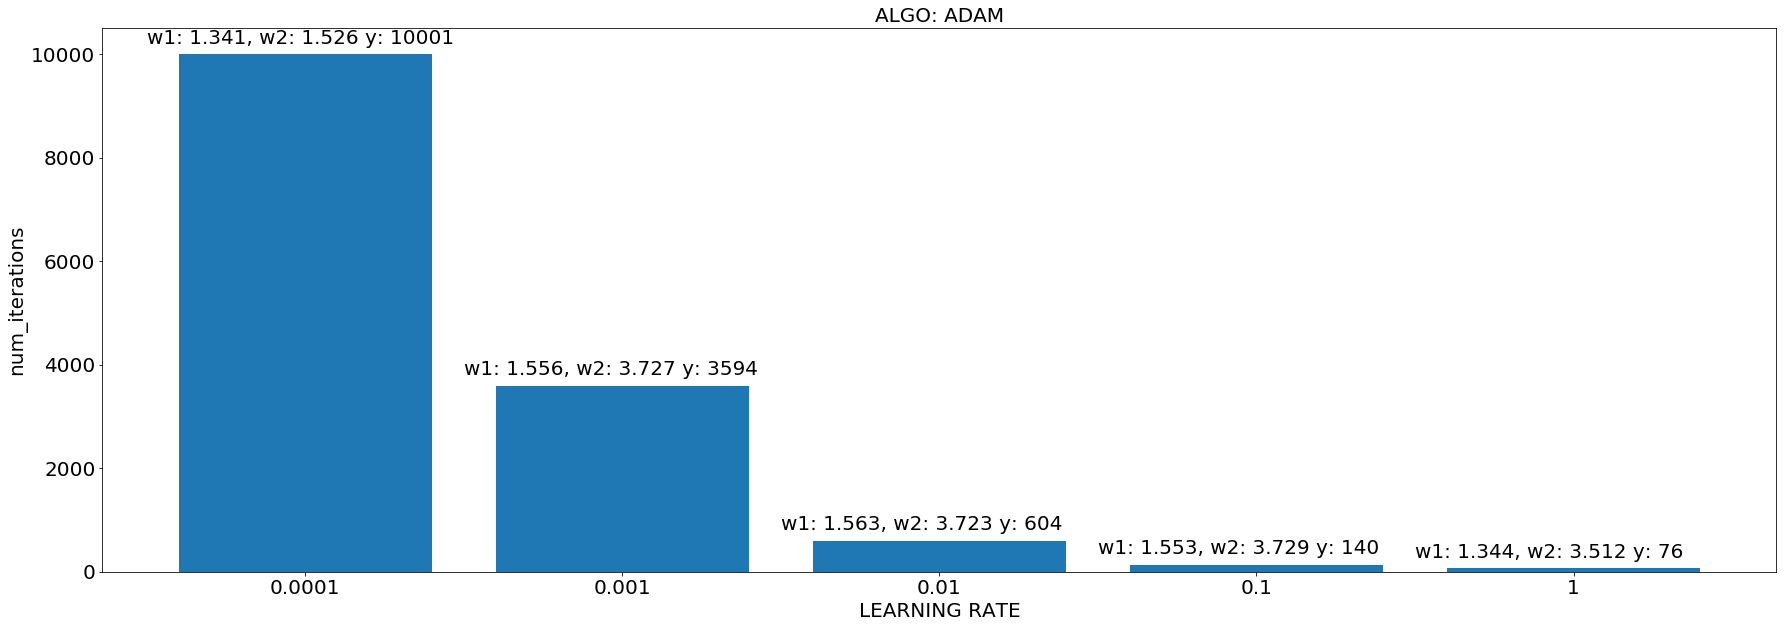

In [18]:
for each_algo in order:
    all_lens = []
    all_learning_rates = []
    tick_labels = []
    w1 = []
    w2 = []
    for each_learning_rate in lst_of_learning_rates:
        viz_ws = dict_w_learning_rates[each_learning_rate][each_algo]
        all_lens.append(len(viz_ws))
        w1.append(viz_ws[-1][0])
        w2.append(viz_ws[-1][1])
        all_learning_rates.append(np.log10(each_learning_rate))
        tick_labels.append(each_learning_rate)
    plt.figure(figsize=(30, 10))
    plt.title('ALGO: {}'.format(each_algo), fontsize=20)
    plt.bar(all_learning_rates, all_lens)
    plt.xlabel('LEARNING RATE', fontsize=20)
    plt.ylabel('num_iterations', fontsize=20)
    plt.xticks(all_learning_rates, [0.0001, 0.001, 0.01, 0.1, 1], fontsize=20)
    plt.yticks(fontsize=20)
    for i, x in enumerate(all_learning_rates):
        plt.text(x - 0.5, all_lens[i] + 200, 'w1: {}, w2: {} y: {}'.format(str(round(w1[i], 3)), str(round(w2[i], 3)), str(all_lens[i])), fontsize=20)
    plt.show()
        
    

In [19]:
plt.text?